# Mentoria: Monitoreo de Espacios Verdes

__DIPLODATOS 2022 - FAMAF UNC__

_Felix Rojo Lapalma_

## Exploración y Curación de Datos 

_GRUPO1_

Alumnos

- Artola, María Fernanda
- Garay, Carolina
- Ormaechea, Sebastián


En esta etapa ya hemos avanzado en (basados en el [TP-Analisis-Visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Analisis-y-Visualizacion-MEV-TP.ipynb)):

- análisis y exploración del conjunto de datos (aunque sea superficialmente)
- set representativo: Es decir, aprendimos que podemos llegar a trabajar con un set mas reducido (de las caracteristicas - columnas del dataframe) e igualmente vamos a estar representando gran parte del conjunto.
- inputacion de valores:   
    - tenemos formas de inputar valores en rangos temporales que no tenemos (para una cierta zona) utilizando otros rangos temporales (aqui aprovechamos fuertemente la estacionalidad de lo que estamos monitoreando)
    - que un outlier en un rango temporal puede ser un valor nominal en otro rango temporal.

- etc

En lo que sigue vamos a aplicar mucho de lo obtenido en el TP anterior para "curar" nuestro dataset con diferentes recetas. Por curar nos referimos a generar los procesos necesarios (trazables y reproducibles) que nos lleven del conjunto original de datos (que debe permanecer inmutable) hasta un conjunto que pueda ser consumido por distintos algorimos de aprendizaje. Las recetas pasaran de las mas simples, hasta algunas mas elaboradas. Una de las intenciones de todo proceso de curacion es salvar, en base a ciertos supuestos, la mayor cantidad de datos (puesto que la recoleccion de los mismos, etc, suele ser un proceso costoso tanto en recursos como en tiempo, entre otras cosas).

### Fuentes

El presente trabajo práctico está inspirado en los correspondientes de:

- [jbergamasco2019](https://github.com/jbergamasco/DiploDatos2019)

- [TP-Analisis-Visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Analisis-y-Visualizacion-MEV-TP.ipynb)

Para una introducción un poco mas extensa respecto al origen de los datos y su procesamiento se pueden referir a :
- [ab-initio-data-build](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md)
- [ab-initio-analisis-visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-analisis-visualizacion.md)


## Sobre el Trabajo Requerido

Se propone la elaboración de un conjunto de procedimientos (\*.py o notebooks) que nos permitan partiendo del dataset original obtener uno nuevo y "curado".
Respecto a las recetas mencionadas, son las que van a dar origen a los distintos procedimientos y nos van a permitir inferir (ya en el proximo TP) la importancia del proceso de curación.

### Sobre las recetas

La idea de construccion de una receta es que pueda ser aprovechada cuando le llegue un set nuevo de datos. Tanto  para su transformacion para incorporarlos al set de entramiento como para su posible uso en inferencia.

__DISCLAIMER__: En lo siguiente vamos a presentar un numero limitado (~4) de recetas (para el problema en cuestión).

### ab-initio

- elija (basados en lo aprendido en el TP anterior) un conjunto de bandas e indices que considere representativo. Adicione a su elección:
    - raster: raster del cual se extraen los estadísticos
    - clouds_on_raster: nubosidad del raster completo
    - osm_id: identificador asociado a la capa original (atlas-espacios-verdes)
    - area_m2: area en metros cuadrados
    - date: fecha de la muestra.
    
    estas variables las sumamos a los efectos practicos de representacion y filtrado.



### [A] Esfuerzo Nulo

- Leer los datos

In [1]:
# Setup necesario para correr pandas profiling
!pip install pandas_profiling==2.8.0
!pip install pandas==1.2.0
####################################
#Importación necesaria para correr pandas profiling y descargar reporte
from pandas_profiling import ProfileReport
###!from google.colab import files
#####################################
# Descarga de base de datos
 #from link @ https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md
#####################################
!pip install gdown
!pip install missingno

In [2]:
# Descarga de archivo
!gdown https://drive.google.com/file/d/1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd
To: C:\Users\Varios\Mentoria - practicos\espacios-verdes-indexs-cba-20170101-20220420.zip

  0%|          | 0.00/170M [00:00<?, ?B/s]
  0%|          | 524k/170M [00:00<01:00, 2.82MB/s]
  1%|          | 1.05M/170M [00:00<01:07, 2.52MB/s]
  1%|          | 1.57M/170M [00:00<01:05, 2.58MB/s]
  1%|1         | 2.10M/170M [00:00<01:06, 2.51MB/s]
  2%|1         | 2.62M/170M [00:01<01:07, 2.49MB/s]
  2%|1         | 3.15M/170M [00:01<01:06, 2.50MB/s]
  2%|2         | 3.67M/170M [00:01<01:07, 2.48MB/s]
  2%|2         | 4.19M/170M [00:01<01:06, 2.49MB/s]
  3%|2         | 4.72M/170M [00:01<01:06, 2.48MB/s]
  3%|3         | 5.24M/170M [00:02<01:05, 2.51MB/s]
  3%|3         | 5.77M/170M [00:02<01:05, 2.51MB/s]
  4%|3         | 6.29M/170M [00:02<01:06, 2.45MB/s]
  4%|4         | 6.82M/170M [00:02<01:05, 2.48MB/s]
  4%|4         | 7.34M/170M [00:02<01:05, 2.51MB/s]
  5%|4         | 7.86M/170M [00:03<01:05, 2.47MB/s]
 

In [3]:
# Carga de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.dates as mdates # Esto sirve para manipular fechas en los gráficos
import matplotlib.pyplot as plt
import datetime

In [4]:
!pip install --upgrade pip
#!pip install kats
#import kats
#from kats.consts import TimeSeriesData
#from kats.tsfeatures.tsfeatures import TsFeatures
#from kats.utils.decomposition import TimeSeriesDecomposition
######
##import statsmodels.api as sm
from pylab import rcParams
#####
!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
# Lectura de csv y obtención de dataframe 
#df_=pd.read_csv("/content/espacios-verdes-indexs-cba-20170101-20220420.zip", index_col=0)
#df_
df_=pd.read_csv("C:/Users/Varios/Desktop/Diplodatos/Mentoria/espacios-verdes-indexs-cba-20170101-20220420.zip",index_col=0)
display(df_.head())
df_.info()
df_.shape

,B02_min,B02_max,B02_mean,B02_median,B02_nodata,B02_range,B02_count,B03_min,B03_max,B03_mean,...,sipi_median,sipi_nodata,sipi_range,sipi_count,raster,clouds_on_raster,osm_id,name,area_m2,date
0,0.0871,0.1421,0.102570,0.09650,0.0,0.0550,47,0.0768,0.1516,0.098885,...,0.884216,0.0,0.453065,47,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,605976736,NaN,4650.710032,2017-01-03
1,0.0970,0.1936,0.118354,0.10660,0.0,0.0966,13,0.1006,0.1949,0.122154,...,0.971875,0.0,0.247045,13,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559322368,NaN,1502.000513,2017-01-03
2,0.0992,0.1273,0.111805,0.11290,0.0,0.0281,19,0.1037,0.1369,0.117795,...,0.973017,0.0,0.207006,19,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559322369,NaN,2004.192528,2017-01-03
3,0.0995,0.1933,0.118491,0.11355,0.0,0.0938,66,0.0993,0.1990,0.124512,...,0.966202,0.0,0.258424,66,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559328111,NaN,6940.507640,2017-01-03
4,0.1059,0.1385,0.122453,0.12240,0.0,0.0326,47,0.1036,0.1580,0.132455,...,0.993986,0.0,0.260419,47,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559328112,NaN,4587.356048,2017-01-03


<class 'pandas.core.frame.DataFrame'>
Int64Index: 208932 entries, 0 to 208931
Columns: 167 entries, B02_min to date
dtypes: float64(140), int64(24), object(3)
memory usage: 267.8+ MB


(208932, 167)

- Extraer las columnas de interes (## ab-initio)

In [7]:
# Creamos un nuevo dataframe con las columnas de interés 
df_interest = df_[["B02_median", "B06_median", "B11_median","osm_id", "date", "ndvi_max", "area_m2","raster","clouds_on_raster"]]
len(df_interest)
df_interest.shape

(208932, 9)

In [8]:
df_interest["id"] = df_interest.index + 1
df_interest['date']= pd.to_datetime(df_interest['date'])
df_interest['date1'] = df_interest['date']

df_interest = df_interest.set_index('date')
df_interest

C:\Users\Varios\AppData\Local\Temp\ipykernel_19196\1830029979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest["id"] = df_interest.index + 1
C:\Users\Varios\AppData\Local\Temp\ipykernel_19196\1830029979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest['date']= pd.to_datetime(df_interest['date'])
C:\Users\Varios\AppData\Local\Temp\ipykernel_19196\1830029979.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,B02_median,B06_median,B11_median,osm_id,ndvi_max,area_m2,raster,clouds_on_raster,id,date1
date,,,,,,,,,,
2017-01-03,0.09650,0.19910,0.18770,605976736,0.630881,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,2017-01-03
2017-01-03,0.10660,0.25960,0.25420,559322368,0.630041,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,2,2017-01-03
2017-01-03,0.11290,0.25550,0.24640,559322369,0.622036,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,3,2017-01-03
2017-01-03,0.11355,0.29300,0.26675,559328111,0.669891,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,4,2017-01-03
2017-01-03,0.12240,0.29460,0.28950,559328112,0.619112,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,5,2017-01-03
...,...,...,...,...,...,...,...,...,...,...
2022-04-17,0.11270,0.20520,0.18950,307532496,0.563955,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208928,2022-04-17
2022-04-17,0.13665,0.23835,0.27315,307535460,0.490798,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208929,2022-04-17
2022-04-17,0.10625,0.22425,0.22230,307796387,0.566516,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208930,2022-04-17


<Figure size 576x396 with 0 Axes>

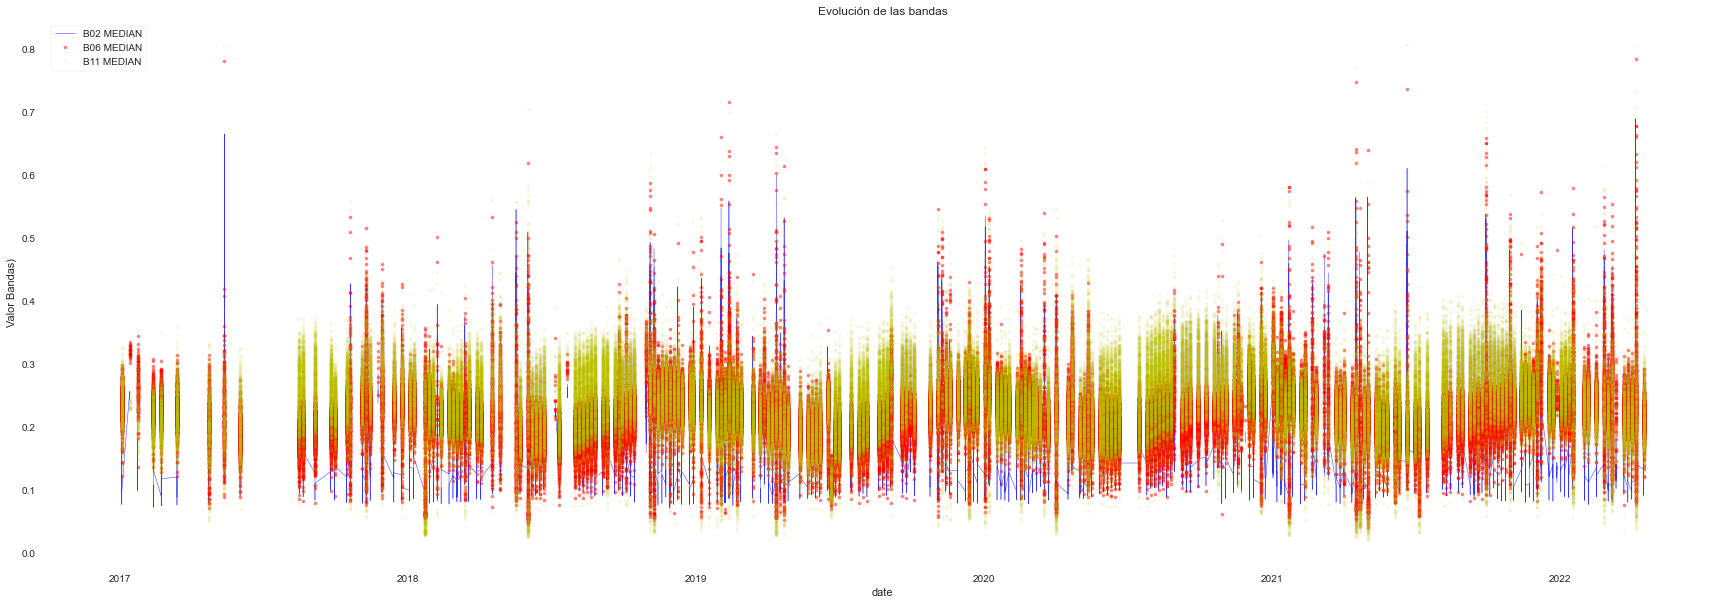

<Figure size 576x396 with 0 Axes>

In [9]:
plt.figure(figsize=(30,10))
plt.plot(df_interest['B02_median'], 'b-', label = 'B02 MEDIAN',linewidth=0.5,alpha=0.8)
plt.plot(df_interest['B06_median'], 'r.', label = 'B06 MEDIAN',linewidth=0.5,alpha=0.5)
plt.plot(df_interest['B11_median'], 'y.', label = 'B11 MEDIAN',linewidth=0.5,alpha=0.1)
plt.legend()
plt.xlabel('date'); plt.ylabel('Valor Bandas)'); plt.title('Evolución de las bandas')
plt.figure()

<Figure size 576x396 with 0 Axes>

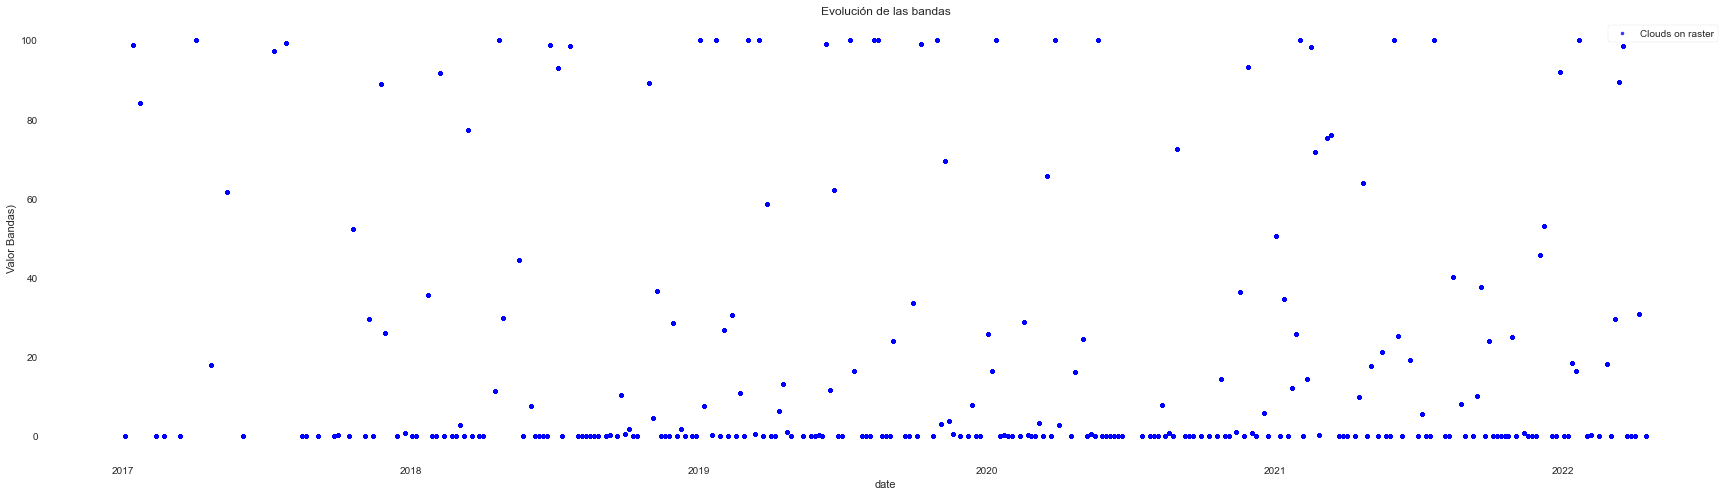

<Figure size 576x396 with 0 Axes>

In [10]:
plt.figure(figsize=(30,8))
plt.plot(df_interest['clouds_on_raster'], 'b.', label = 'Clouds on raster',linewidth=0.4,alpha=0.8)
plt.legend()
plt.xlabel('date'); plt.ylabel('Valor Bandas)'); plt.title('Evolución de las bandas')
plt.figure()


<AxesSubplot:>

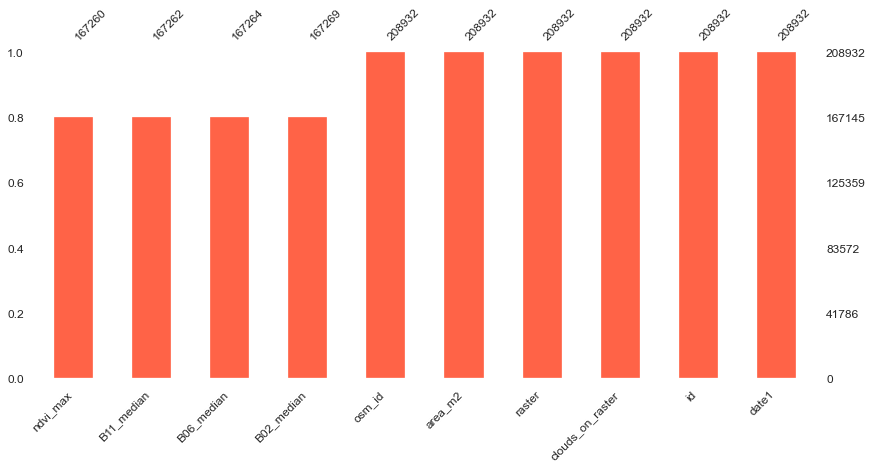

In [11]:
# Utilizamos la librería missingno para el análisis de datos faltantes 
import missingno as msno
# Graficamos los datos faltantes de varias variables, incluidas las de interés
msno.bar(df_interest,figsize=(14, 6), sort="ascending",fontsize=12, color='tomato') 

- Desechar valores nulos

In [12]:
# Desechamos valores nulos de las columnas de interés y generamos nuevo dataframe 
df_interest_A1=df_interest.dropna(subset=["B02_median","B06_median","B11_median"])

<AxesSubplot:>

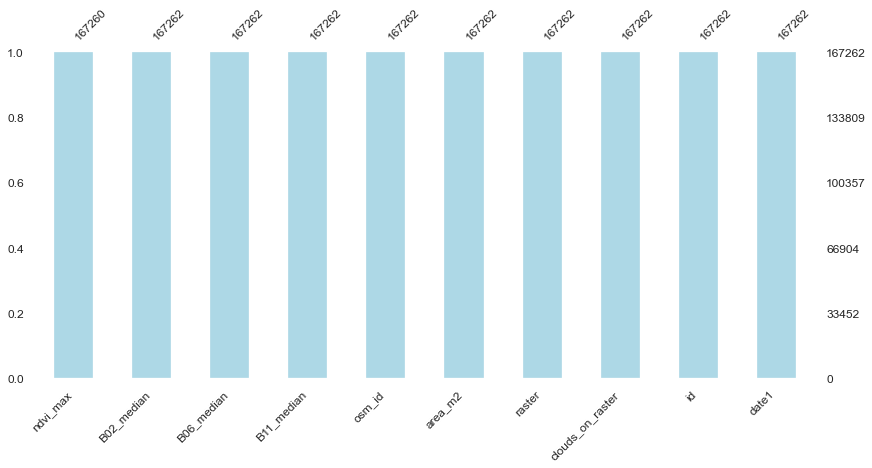

In [13]:
# Graficamos nuevamente y observamos que ya no hay presentes valores nulos
msno.bar(df_interest_A1,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue') 

- Filtrar por nubosidad < 10%

In [14]:
# Filtramos por nubosidad < 10% y creamos nuevo dataframe
print(df_interest_A1.clouds_on_raster.value_counts())
####
df_interest_A2=df_interest_A1[df_interest_A1['clouds_on_raster']<0.1]
len(df_interest_A2)

0.000000     110639
0.186023        757
0.212517        757
0.112178        757
0.331584        757
              ...  
98.880824        25
98.602103        18
92.987497        13
89.006244         8
93.299774         2
Name: clouds_on_raster, Length: 105, dtype: int64


114424

- Remocion de Outliers (a nivel general sin considerar estacionalidad)

Para remover outliers, primero definimos una función que genere nuevas columnas que diferencien outliers (valor=1), del resto de los registros (valor=0).
Luego, para la eliminación de outliers, aplicamos el criterio de quitar aquellos registros donde se observa que para las tres bandas bajo análisis (columnas), los valores son outliers (valor=1).  

In [15]:
def find_outliers(df_interest, col_list):
    # calculamos cuartiles 1 y 3, y el interquartil (iqr)
    for col in col_list:
        if col=="NaN":
            continue
        q1 = df_interest[col].quantile(0.25)
        q3 = df_interest[col].quantile(0.75)
        iqr = q3 - q1 
        # calculamos límite superior e inferior
        ls = q1 + 1.5 * iqr
        li = q3 - 1.5 * iqr
        # Generamos nueva columna
        df_interest['outl_'+col]=  np.where((df_interest[col] >ls)| (df_interest[col] < li),1,0)

In [16]:
bandas = ['B02_median', 'B06_median', 'B11_median']
find_outliers(df_interest_A2, bandas)

C:\Users\Varios\AppData\Local\Temp\ipykernel_19196\229175643.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest['outl_'+col]=  np.where((df_interest[col] >ls)| (df_interest[col] < li),1,0)
C:\Users\Varios\AppData\Local\Temp\ipykernel_19196\229175643.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest['outl_'+col]=  np.where((df_interest[col] >ls)| (df_interest[col] < li),1,0)
C:\Users\Varios\AppData\Local\Temp\ipykernel_19196\229175643.py:13: SettingWithCopyWarning: 
A value is tr

In [17]:
df_interest_A2

,B02_median,B06_median,B11_median,osm_id,ndvi_max,area_m2,raster,clouds_on_raster,id,date1,outl_B02_median,outl_B06_median,outl_B11_median
date,,,,,,,,,,,,,
2017-01-03,0.09650,0.19910,0.18770,605976736,0.630881,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,2017-01-03,1,0,0
2017-01-03,0.10660,0.25960,0.25420,559322368,0.630041,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,2,2017-01-03,0,1,0
2017-01-03,0.11290,0.25550,0.24640,559322369,0.622036,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,3,2017-01-03,0,0,0
2017-01-03,0.11355,0.29300,0.26675,559328111,0.669891,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,4,2017-01-03,0,1,0
2017-01-03,0.12240,0.29460,0.28950,559328112,0.619112,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,5,2017-01-03,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-17,0.11270,0.20520,0.18950,307532496,0.563955,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208928,2022-04-17,0,0,0
2022-04-17,0.13665,0.23835,0.27315,307535460,0.490798,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208929,2022-04-17,0,0,0
2022-04-17,0.10625,0.22425,0.22230,307796387,0.566516,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208930,2022-04-17,0,0,0


In [18]:
# Se quitan aquellos registros donde se observa que para las tres bandas bajo análisis, los valores son outliers
df_interest_A3 = df_interest_A2[~((df_interest_A2['outl_B02_median']==1) & (df_interest_A2['outl_B06_median']==1) & (df_interest_A2['outl_B11_median']==1))]
len(df_interest_A3)

112391

In [19]:
df_interest_A3=pd.DataFrame(df_interest_A3)
df_interest_A3

,B02_median,B06_median,B11_median,osm_id,ndvi_max,area_m2,raster,clouds_on_raster,id,date1,outl_B02_median,outl_B06_median,outl_B11_median
date,,,,,,,,,,,,,
2017-01-03,0.09650,0.19910,0.18770,605976736,0.630881,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,2017-01-03,1,0,0
2017-01-03,0.10660,0.25960,0.25420,559322368,0.630041,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,2,2017-01-03,0,1,0
2017-01-03,0.11290,0.25550,0.24640,559322369,0.622036,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,3,2017-01-03,0,0,0
2017-01-03,0.11355,0.29300,0.26675,559328111,0.669891,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,4,2017-01-03,0,1,0
2017-01-03,0.12240,0.29460,0.28950,559328112,0.619112,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,5,2017-01-03,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-17,0.11270,0.20520,0.18950,307532496,0.563955,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208928,2022-04-17,0,0,0
2022-04-17,0.13665,0.23835,0.27315,307535460,0.490798,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208929,2022-04-17,0,0,0
2022-04-17,0.10625,0.22425,0.22230,307796387,0.566516,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208930,2022-04-17,0,0,0


- Grabar los datos transformados

In [20]:
# Aquí está faltando el paso de grabar los resultados

### Receta [B] Imputacion General + Filtrado Por Nubosidad 

- Leer los datos
- Extraer las columnas de interes (## ab-initio)

In [21]:
# Dado que la lectura de datos y extracción de columnas ya se realizó anteriormente, generamos un nuevo dataframe para 
# procesar, en base a df_interest. Este contiene las columnas de interés pero sin ningún procesamiento.
df_interest_B1 = df_interest.copy()
len(df_interest_B1)

208932

In [22]:
df_interest_B1.describe()

,B02_median,B06_median,B11_median,osm_id,ndvi_max,area_m2,clouds_on_raster,id
count,167269.000000,167264.000000,167262.000000,2.089320e+05,167260.000000,2.089320e+05,208932.000000,208932.000000
mean,0.129623,0.217933,0.238991,4.343631e+08,0.501846,1.249388e+04,19.473638,104466.500000
std,0.035332,0.044101,0.057024,2.141069e+08,0.137381,7.895730e+04,33.424013,60313.617559
min,0.061900,0.040500,0.021300,1.331006e+06,-0.194614,4.225951e+02,0.000000,1.000000
25%,0.110300,0.191700,0.204150,2.867065e+08,0.408413,2.066559e+03,0.000000,52233.750000
50%,0.122800,0.217450,0.238100,3.596742e+08,0.516362,3.812182e+03,0.000000,104466.500000
75%,0.137800,0.241400,0.274000,6.059767e+08,0.609126,6.644794e+03,25.009939,156699.250000
max,0.689700,0.784500,0.806100,9.249657e+08,0.999486,1.370630e+06,100.000000,208932.000000


- Remoción de Outliers (a nivel general sin considerar estacionalidad)

In [23]:
# Aplicamos la función desarrollada anteriormente
find_outliers(df_interest_B1, bandas)
# Removemos outliers
df_interest_B2 = df_interest_B1[~((df_interest_B1['outl_B02_median']==1) & (df_interest_B1['outl_B06_median']==1) & (df_interest_B1['outl_B11_median']==1))]
len(df_interest_B2)

200681

- Imputar valores nulos (definir el criterio, o estadistico, _media_, _mediana_, etc)

Iterative imputation refers to a process where each feature is modeled as a function of the other features, e.g. a regression problem where missing values 
are predicted. 

Each feature is imputed sequentially, one after the other, 
allowing prior imputed values to be used as part of a model in predicting subsequent features.

It is iterative because this process is repeated multiple times, allowing ever improved estimates of missing values to 
be calculated as missing values across all features are estimated.

This approach may be generally referred to as fully conditional specification (FCS) or multivariate imputation by chained equations (MICE).

Different regression algorithms can be used to estimate the missing values for each feature, although linear methods 
are often used for simplicity. The number of iterations of the procedure is often kept small, such as 10. Finally, the order 
that features are processed sequentially can be considered, such as from the 
feature with the least missing values to the feature with the most missing values.

In [24]:
# Imputamos valores nulos bajo el criterio del vecino más cercano
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

df_interest_B3 = df_interest_B2.copy()

C:\Users\Varios\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


200681


<AxesSubplot:>

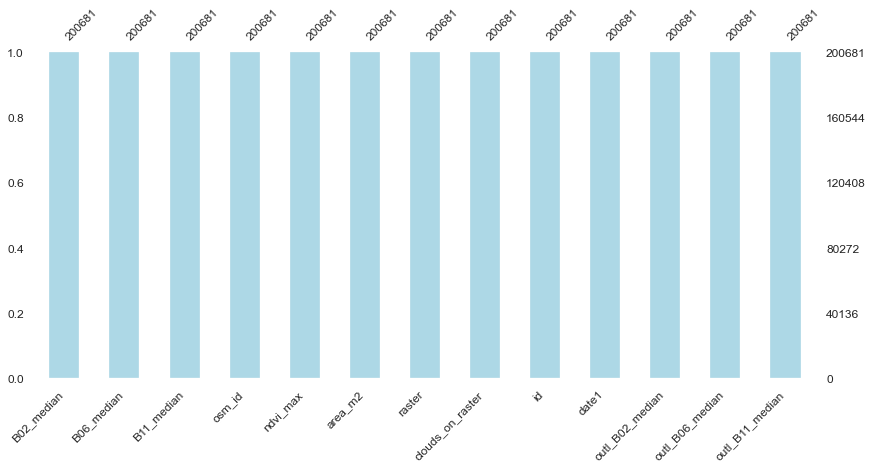

In [25]:
kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_interest_B3[['ndvi_max','B02_median', 'B06_median', 'B11_median']] = kn_imputer.fit_transform(df_interest_B3[['ndvi_max','B02_median', 'B06_median', 'B11_median']])
print(len(df_interest_B3))
msno.bar(df_interest_B3,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue')

- Filtrar por nubosidad < 10%

In [26]:
# Filtrar por nubosidad < 10%
df_interest_B4=df_interest_B3[df_interest_B3['clouds_on_raster']<0.1]
len(df_interest_B4)

114497

- Grabar los datos transformados

In [27]:
# Aquí está faltando el paso de grabar los resultados

### Receta [C] Imputacion Estacional + Filtrado Por Nubosidad 

- Leer los datos
- Extraer las columnas de interes (## ab-initio)

In [28]:
# Dado que la lectura de datos y extracción de columnas ya se realizó anteriormente, generamos un nuevo dataframe para 
# procesar, en base a df_interest. Este contiene las columnas de interés pero sin ningún procesamiento.
df_interest_C1 = df_interest.copy()
df_interest_C1

,B02_median,B06_median,B11_median,osm_id,ndvi_max,area_m2,raster,clouds_on_raster,id,date1
date,,,,,,,,,,
2017-01-03,0.09650,0.19910,0.18770,605976736,0.630881,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,2017-01-03
2017-01-03,0.10660,0.25960,0.25420,559322368,0.630041,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,2,2017-01-03
2017-01-03,0.11290,0.25550,0.24640,559322369,0.622036,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,3,2017-01-03
2017-01-03,0.11355,0.29300,0.26675,559328111,0.669891,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,4,2017-01-03
2017-01-03,0.12240,0.29460,0.28950,559328112,0.619112,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,5,2017-01-03
...,...,...,...,...,...,...,...,...,...,...
2022-04-17,0.11270,0.20520,0.18950,307532496,0.563955,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208928,2022-04-17
2022-04-17,0.13665,0.23835,0.27315,307535460,0.490798,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208929,2022-04-17
2022-04-17,0.10625,0.22425,0.22230,307796387,0.566516,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208930,2022-04-17


In [29]:
len(df_interest_C1)

208932

- Remoción de Outliers (a nivel estacional - SIN refinar por año)

In [30]:
# Para la remoción de outliers por estación, defiinimos la estación a la que corresponde cada registro. 
# Convertimos la columna date a tipo datetime
#df_interest_C1['date']= pd.to_datetime(df_interest_C1['date'])
#df_interest_C1 = df_interest_C1.set_index('date')
#df_interest_C1.head

# Extraemos el mes de cada registro.
#df_interest_C1['month'] = df_interest_C1['date'].dt.month

# Aplicamos la siguiente función para determinar la estación a la que corresponde cada registro.
#def seasons(df, col):
 #   Seasons = []
  #  for month in df[col]:
   #     if month in (1, 2, 3):
    #        season = 'summer'
     #   elif month in (4, 5, 6):
      #      season = 'autumn'
       # elif month in (7, 8, 9):
        #    season = 'winter'
        #else:
        #    season = 'spring'
        #Seasons.append(season)
    #df["season"]= Seasons

#seasons(df_interest_C1, "month")
#df_interest_C1

In [31]:
# Generamos nuevas columnas de cada banda para cada estación
#df_interest_C1.loc[df_interest_C1['season'] == 'summer', 'B02_summer'] = df_interest_C1['B02_median']  
#df_interest_C1.loc[df_interest_C1['season'] == 'autumn', 'B02_autumn'] = df_interest_C1['B02_median']
#df_interest_C1.loc[df_interest_C1['season'] == 'winter', 'B02_winter'] = df_interest_C1['B02_median']
#df_interest_C1.loc[df_interest_C1['season'] == 'spring', 'B02_spring'] = df_interest_C1['B02_median']

#df_interest_C1.loc[df_interest_C1['season'] == 'summer', 'B06_summer'] = df_interest_C1['B06_median']  
#df_interest_C1.loc[df_interest_C1['season'] == 'autumn', 'B06_autumn'] = df_interest_C1['B06_median']
#df_interest_C1.loc[df_interest_C1['season'] == 'winter', 'B06_winter'] = df_interest_C1['B06_median']
#df_interest_C1.loc[df_interest_C1['season'] == 'spring', 'B06_spring'] = df_interest_C1['B06_median']

#df_interest_C1.loc[df_interest_C1['season'] == 'summer', 'B11_summer'] = df_interest_C1['B11_median']  
#df_interest_C1.loc[df_interest_C1['season'] == 'autumn', 'B11_autumn'] = df_interest_C1['B11_median']
#df_interest_C1.loc[df_interest_C1['season'] == 'winter', 'B11_winter'] = df_interest_C1['B11_median']
#df_interest_C1.loc[df_interest_C1['season'] == 'spring', 'B11_spring'] = df_interest_C1['B11_median']

In [32]:
# Creamos lista de nuevas columnas para usarla como argumento en la función que detecta outliers
#Season_values = ['B02_summer', 'B02_autumn', 'B02_winter', 'B02_spring', 'B06_summer', 'B06_autumn', 'B06_winter', 
 #               'B06_spring', 'B11_summer', 'B11_autumn', 'B11_winter', 'B11_spring']

# Aplicamos la función de detección de outliers
#find_outliers(df_interest_C1, Season_values)

In [39]:
# Se quitan aquellos registros donde se observa que para las tres bandas bajo análisis (en cada estación), 
# los valores son outliers (valor = 1)
#df_interest_E2_summer = df_interest_C1[~((df_interest_C1['outl_B02_summer']==1) & (df_interest_C1['outl_B06_summer']==1) & 
 #                       (df_interest_C1['outl_B11_summer']==1))]
#print(len(df_interest_E2_summer))

#df_interest_E2_autumn = df_interest_E2_summer[~((df_interest_C1['outl_B02_autumn']==1) & 
                        (df_interest_E2_summer['outl_B06_autumn']==1) & (df_interest_E2_summer['outl_B11_autumn']==1))]
#print(len(df_interest_E2_autumn))

#df_interest_E2_winter = df_interest_E2_autumn[~((df_interest_C1['outl_B02_winter']==1) & 
                        (df_interest_E2_autumn['outl_B06_winter']==1) & (df_interest_E2_autumn['outl_B11_winter']==1))]
#print(len(df_interest_E2_winter))

#df_interest_E2_spring = df_interest_E2_winter[~((df_interest_C1['outl_B02_spring']==1) & 
 #                       (df_interest_E2_winter['outl_B06_spring']==1) & (df_interest_E2_winter['outl_B11_spring']==1))]
#print(len(df_interest_E2_spring))

IndentationError: unexpected indent (2061221052.py, line 8)

In [40]:
#msno.bar(df_interest_C2_spring,figsize=(14, 6), sort="ascending",fontsize=12, color='tomato')

In [41]:
###Alternativa para remover outliers descomponiendo la serie############

In [42]:
#Bajo esta alternativa se remueven los outliers a partir de las variaciones observadas en el componente "ruido" de la serie de tiempo.

#Primero se descompone la serie en tendencia, estacionalidad y ruido suponiendo que está modelada de forma : aditiva o multiplicativa.

#El modelo aditivo es apropiado cuando la magnitud de las
#fluctuaciones estacionales de la serie no varıa al hacerlo la tendencia.

#y_i = t_i + s_i + n_i

#where y_i = el valor que asume la serie de tiempo en el momento i.
#t_i = el componente tendencia en el momento i -presenta las variaciones a largo plazo-.
#s_i = el componente estacional en el momento i -releja las variaciones a corto plazo-.
#n_i = el ruido en el momenot i.

#El modelo multiplicativo es apropiado cuando la magnitud de las
#fluctuaciones estacionales de la serie crece y decrece
#proporcionalmente con los crecimientos y decrecimientos
#de la tendencia, respectivamente.

#y_i = t_i * s_i * n_i
#
################################################################
from statsmodels.tsa import seasonal
import numpy as np
import pandas as pd
###
df_interest_C1_=df_interest_C1.dropna(subset=["B02_median","B06_median","B11_median"])
df_interest_C1

,B02_median,B06_median,B11_median,osm_id,ndvi_max,area_m2,raster,clouds_on_raster,id,date1
date,,,,,,,,,,
2017-01-03,0.09650,0.19910,0.18770,605976736,0.630881,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,2017-01-03
2017-01-03,0.10660,0.25960,0.25420,559322368,0.630041,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,2,2017-01-03
2017-01-03,0.11290,0.25550,0.24640,559322369,0.622036,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,3,2017-01-03
2017-01-03,0.11355,0.29300,0.26675,559328111,0.669891,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,4,2017-01-03
2017-01-03,0.12240,0.29460,0.28950,559328112,0.619112,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,5,2017-01-03
...,...,...,...,...,...,...,...,...,...,...
2022-04-17,0.11270,0.20520,0.18950,307532496,0.563955,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208928,2022-04-17
2022-04-17,0.13665,0.23835,0.27315,307535460,0.490798,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208929,2022-04-17
2022-04-17,0.10625,0.22425,0.22230,307796387,0.566516,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208930,2022-04-17


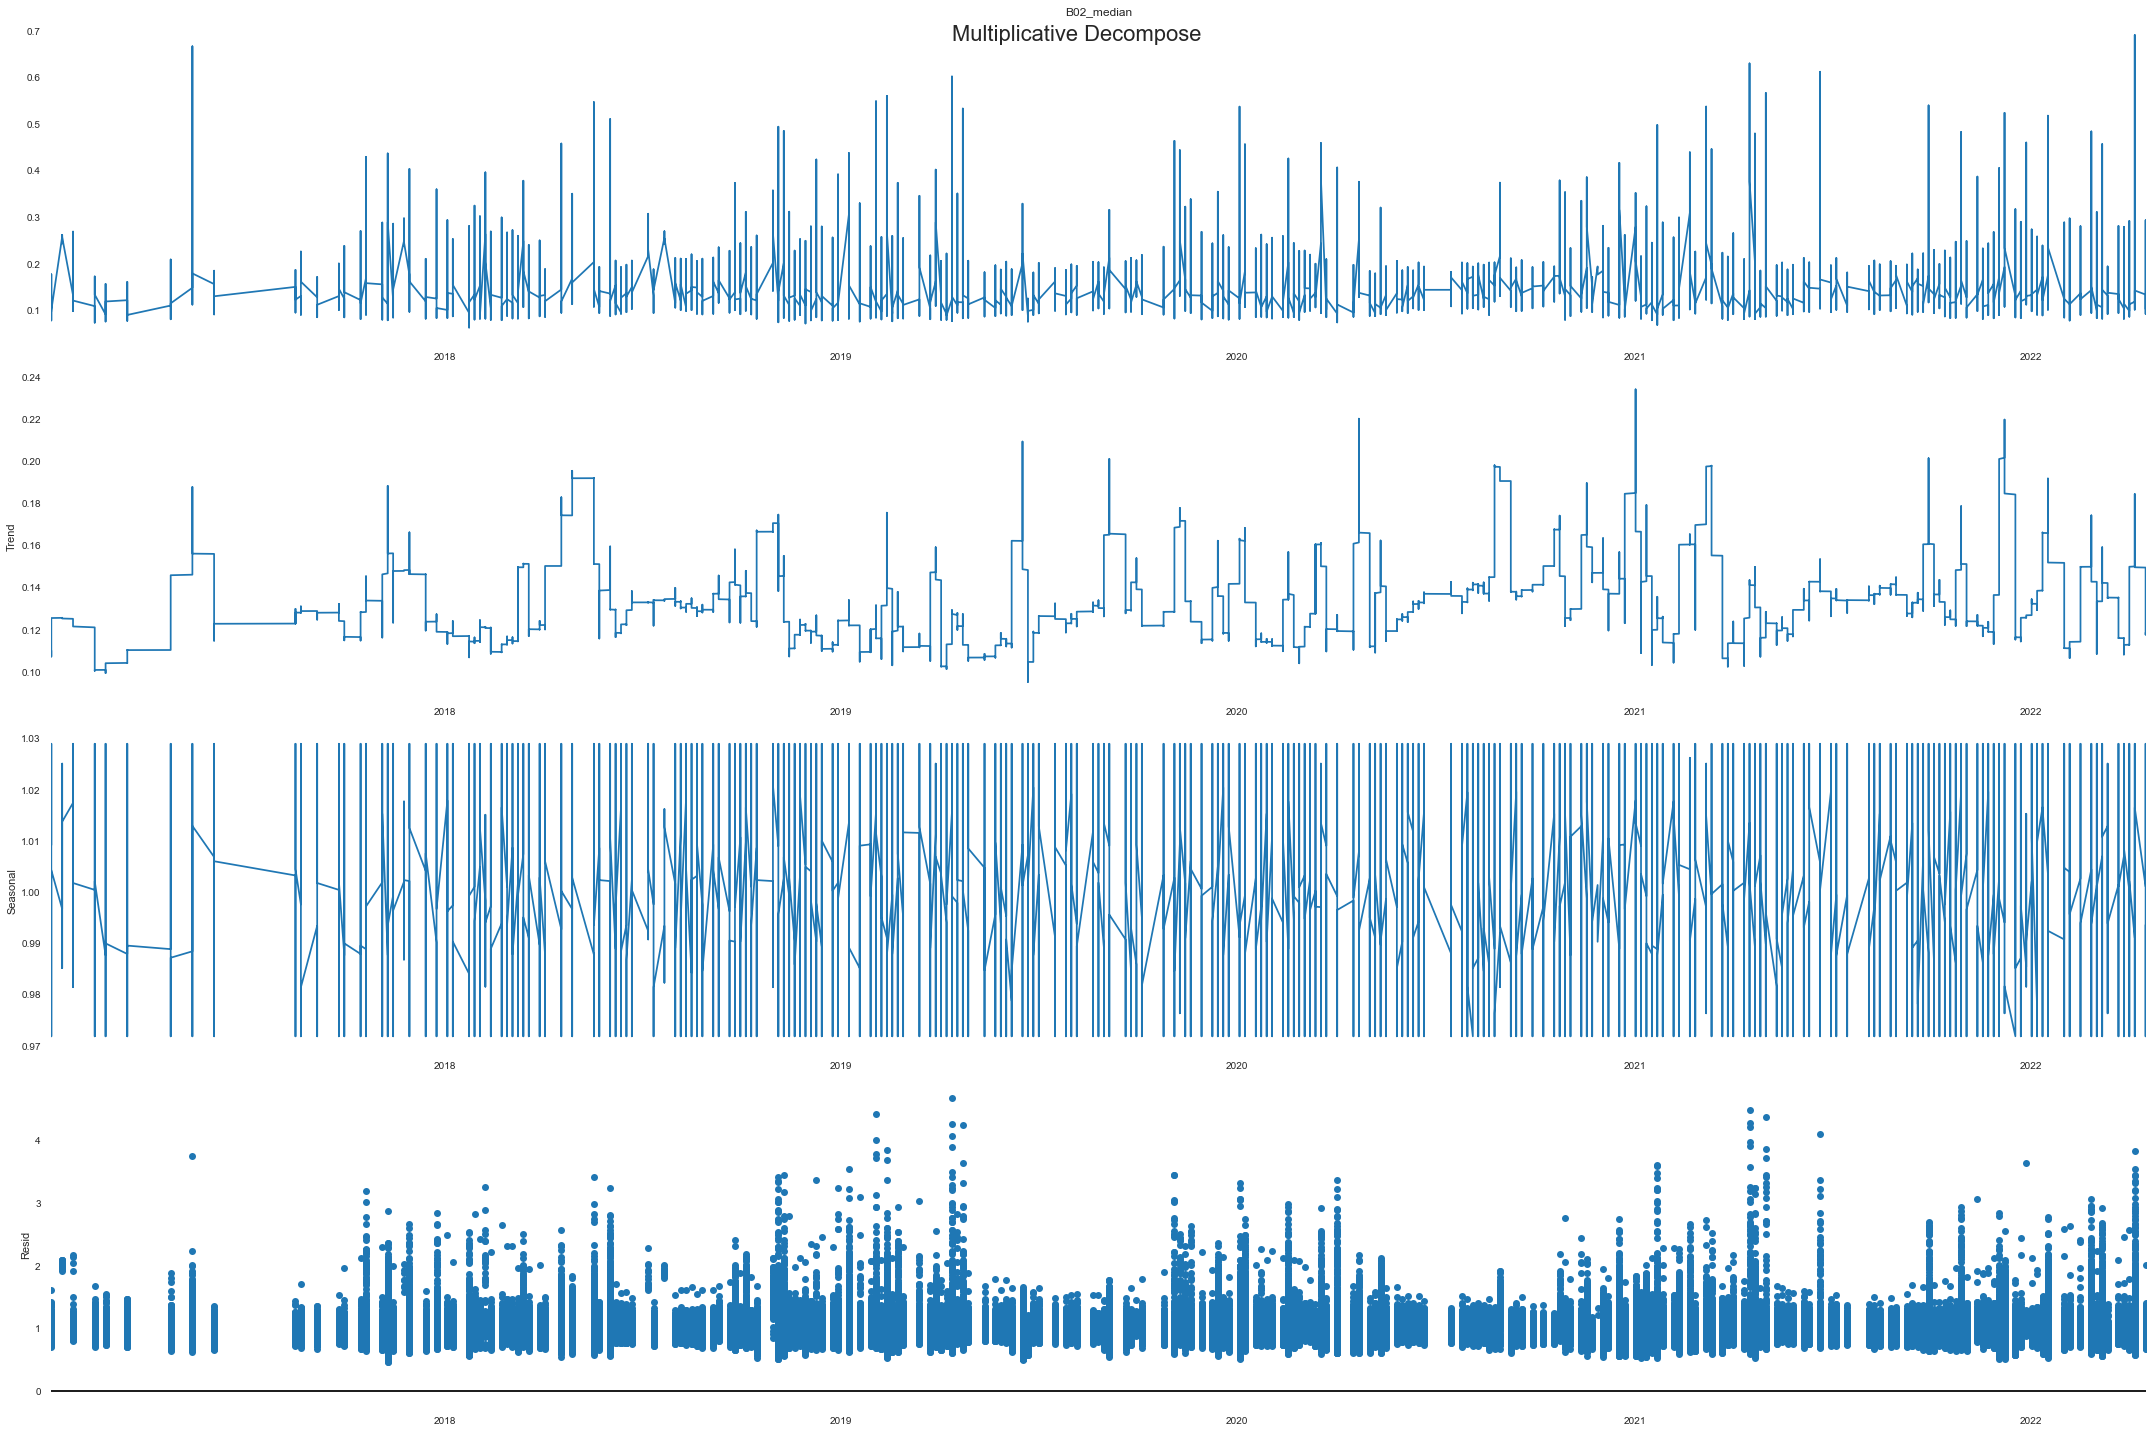

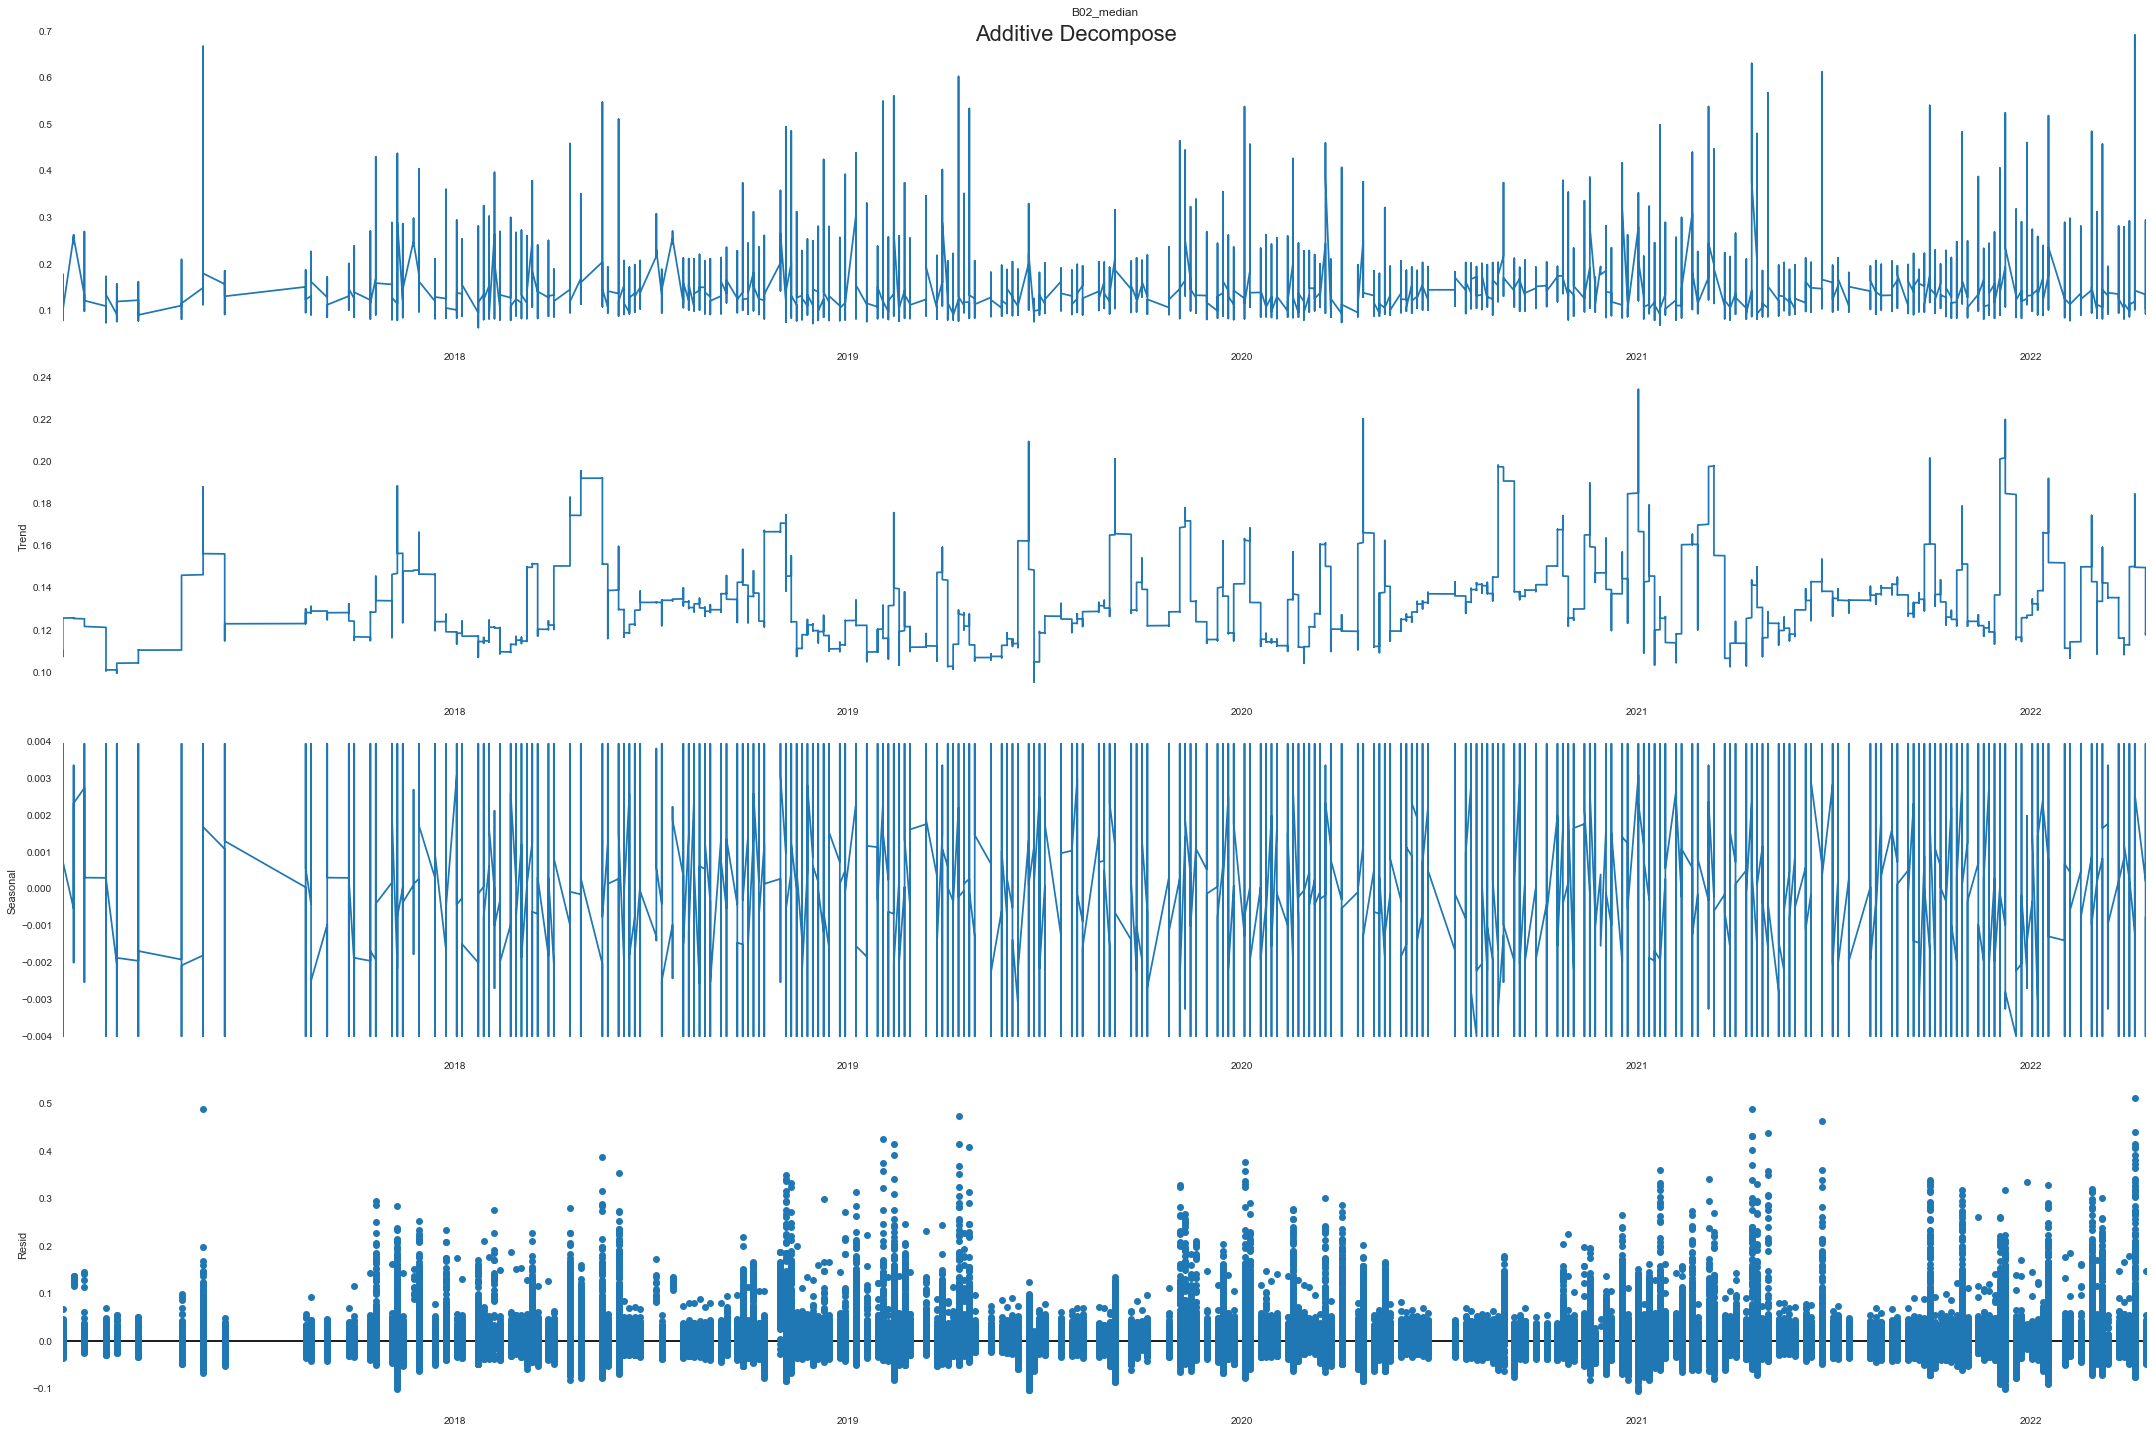

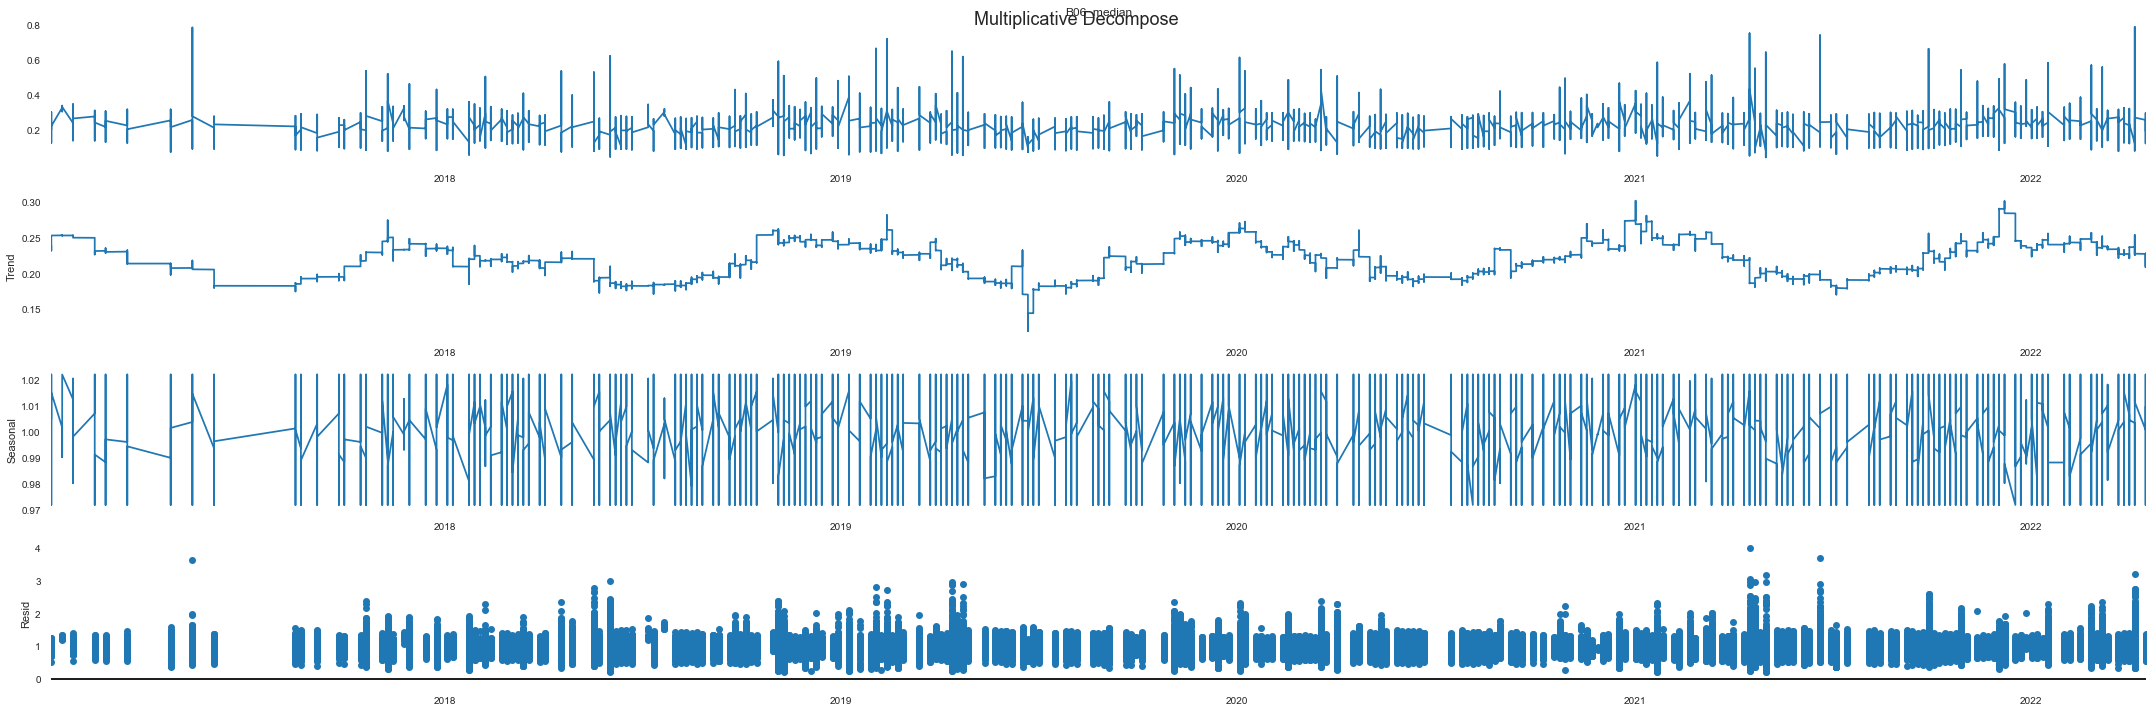

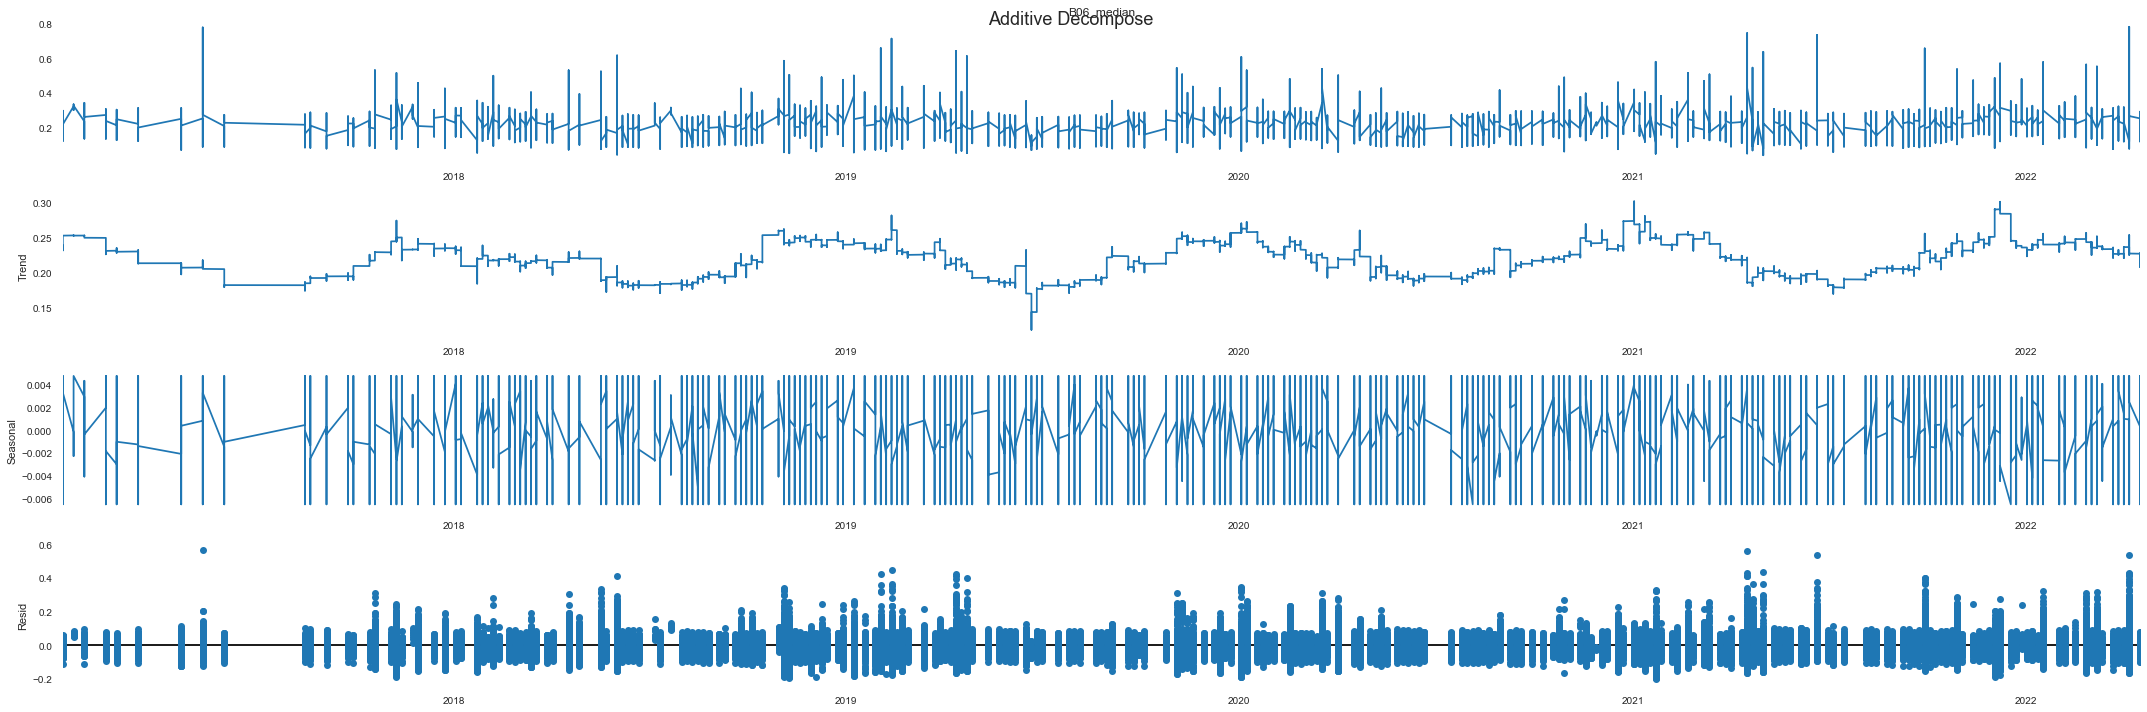

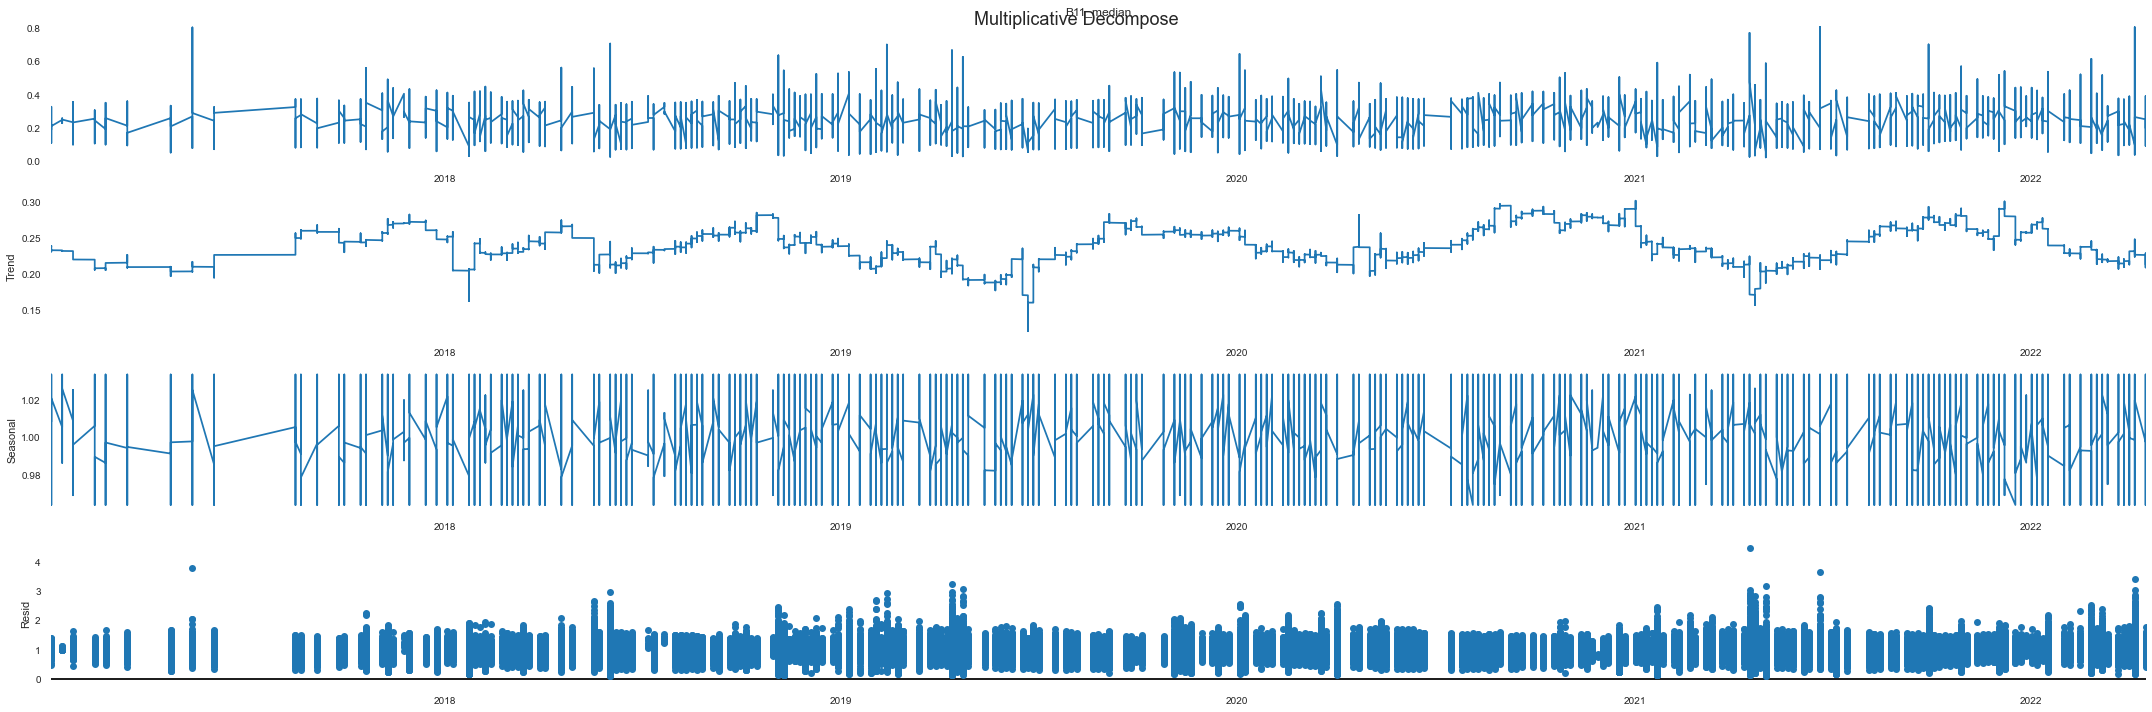

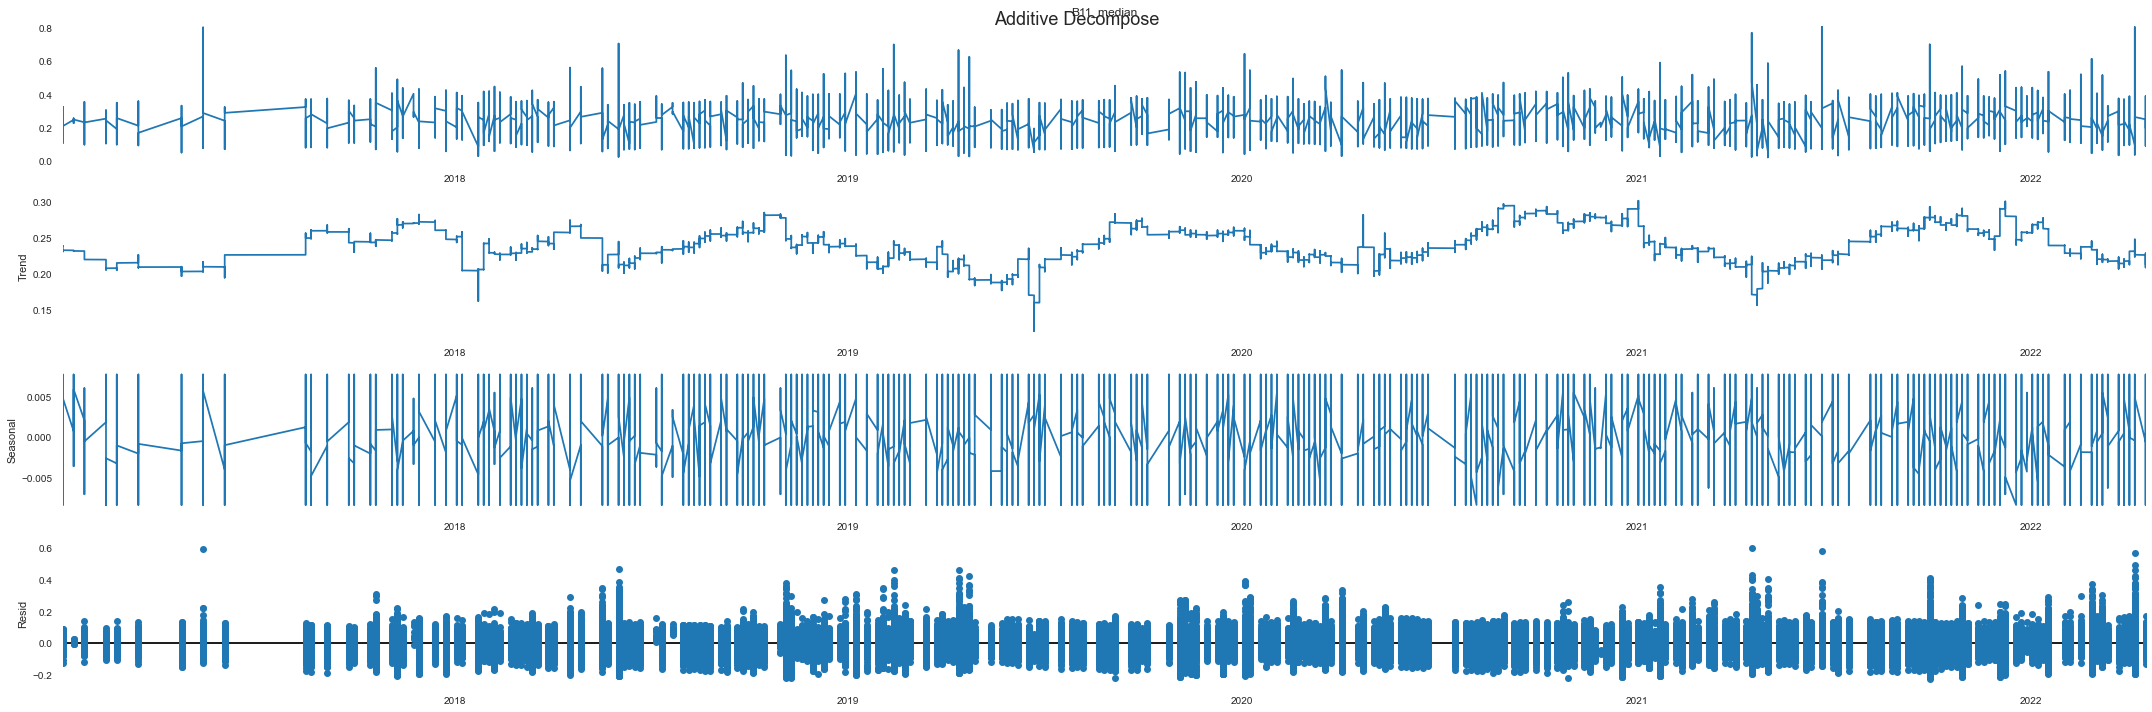

In [43]:
# Multiplicative Decomposition B02_MEDIAN
result_mul_B02 = seasonal.seasonal_decompose(df_interest_C1_['B02_median'], model='multiplicative',period=365)
# Additive Decomposition
result_add_B02 = seasonal.seasonal_decompose(df_interest_C1_['B02_median'], model='additive',period=365)
# Plot
plt.rcParams.update({'figure.figsize': (30,20)})
result_mul_B02.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add_B02.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

# Multiplicative Decomposition B06_MEDIAN
result_mul_B06 = seasonal_decompose(df_interest_C1_['B06_median'], model='multiplicative', period=365)
# Additive Decomposition
result_add_B06 = seasonal_decompose(df_interest_C1_['B06_median'], model='additive', period=365)
# Plot
plt.rcParams.update({'figure.figsize': (30,10)})
result_mul_B06.plot().suptitle('Multiplicative Decompose', fontsize=18)
result_add_B06.plot().suptitle('Additive Decompose', fontsize=18)
plt.show()

#########################################
# Multiplicative Decomposition B11_MEDIAN
result_mul_B11 = seasonal_decompose(df_interest_C1_['B11_median'], model='multiplicative', period=365)
# Additive Decomposition
result_add_B11 = seasonal_decompose(df_interest_C1_['B11_median'], model='additive', period=365)
# Plot
plt.rcParams.update({'figure.figsize': (30,10)})
result_mul_B11.plot().suptitle('Multiplicative Decompose', fontsize=18)
result_add_B11.plot().suptitle('Additive Decompose', fontsize=18)
plt.show()

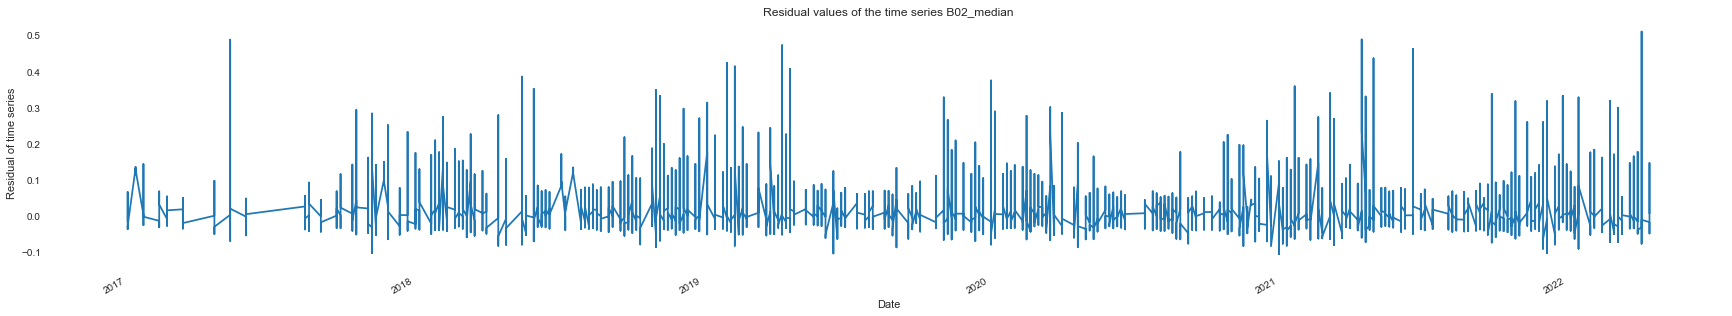

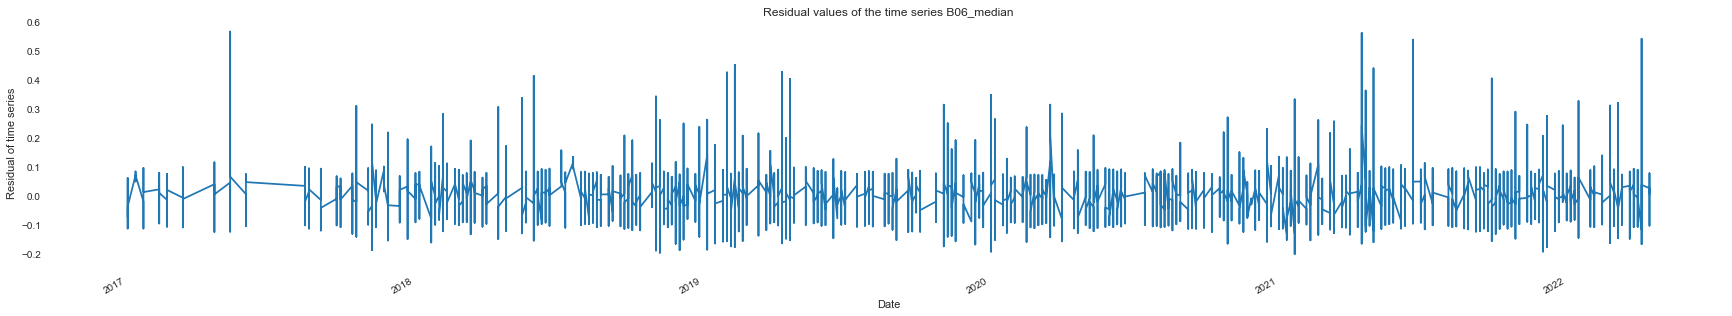

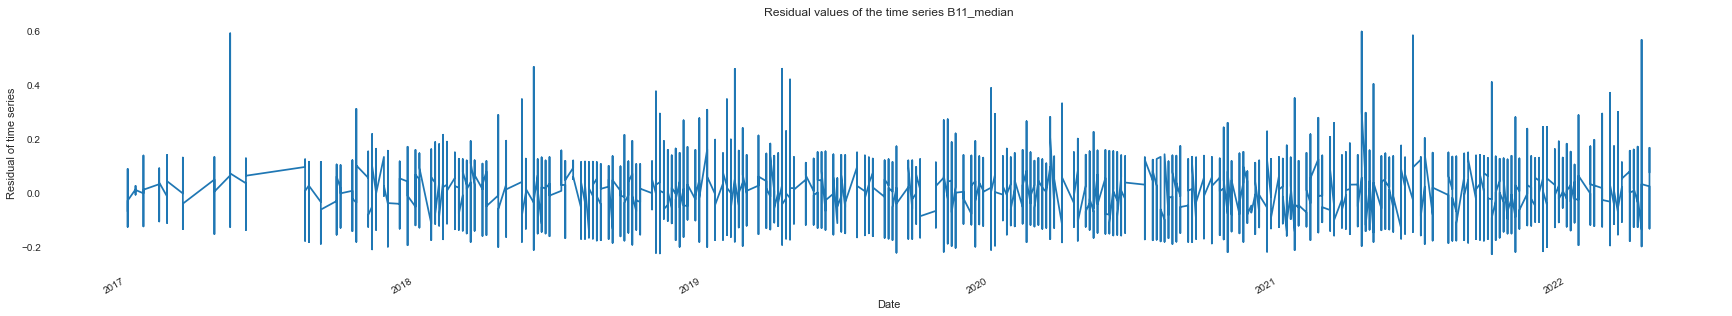

167262

In [44]:
##########################################
##Se grafica el componente 'noise' ###
decomp_resid_B02 = result_add_B02.resid
ax = decomp_resid_B02.plot(figsize=(30, 5))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series B02_median')
plt.show()
#############
############
decomp_resid_B06 = result_add_B06.resid
ax = decomp_resid_B06.plot(figsize=(30, 5))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series B06_median')
plt.show()
#############
############
decomp_resid_B11 = result_add_B11.resid
ax = decomp_resid_B11.plot(figsize=(30, 5))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series B11_median')
plt.show()

#####
decomp_resid_B02.describe()
len(decomp_resid_B02)

In [45]:
#####################################################################################
## A partir del compoenente "noise", se quitan aquellas observaciones con residuos extremos
###################
decomp_resid_B02=pd.DataFrame(decomp_resid_B02)

q1 = decomp_resid_B02['resid'].quantile(0.25)
q3 = decomp_resid_B02['resid'].quantile(0.75)
iqr = q3 - q1 
################
# calculamos límite superior e inferior
ls = q1 + 1.5 * iqr
li = q3 - 1.5 * iqr

# Generamos nueva columna
df_interest_C1_['out_B02']=np.where((decomp_resid_B02['resid'] >ls)|(decomp_resid_B02['resid'] < li),1,0)
df_interest_C1_                 

decomp_resid_B06=pd.DataFrame(decomp_resid_B06)
################################################################################
q1 = decomp_resid_B06['resid'].quantile(0.25)
q3 = decomp_resid_B06['resid'].quantile(0.75)
iqr = q3 - q1 
        # calculamos límite superior e inferior
ls = q1 + 1.5 * iqr
li = q3 - 1.5 * iqr

# Generamos nueva columna
df_interest_C1_['out_B06']=np.where((decomp_resid_B06['resid'] >ls)|(decomp_resid_B06['resid'] < li),1,0)
df_interest_C1_

decomp_resid_B11=pd.DataFrame(decomp_resid_B11)
######################################################################
q1 = decomp_resid_B11['resid'].quantile(0.25)
q3 = decomp_resid_B11['resid'].quantile(0.75)
iqr = q3 - q1 
# calculamos límite superior e inferior
ls = q1 + 1.5 * iqr
li = q3 - 1.5 * iqr
# Generamos nueva columna
df_interest_C1_['out_B11']=np.where((decomp_resid_B11['resid'] >ls)|(decomp_resid_B11['resid'] < li),1,0)
df_interest_C1_

C:\Users\Varios\AppData\Local\Temp\ipykernel_19196\1218764847.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest_C1_['out_B02']=np.where((decomp_resid_B02['resid'] >ls)|(decomp_resid_B02['resid'] < li),1,0)
C:\Users\Varios\AppData\Local\Temp\ipykernel_19196\1218764847.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest_C1_['out_B06']=np.where((decomp_resid_B06['resid'] >ls)|(decomp_resid_B06['resid'] < li),1,0)
C:\Users\Varios\AppData\Local\Temp\ipykernel_19196\1218764847.py:40: S

,B02_median,B06_median,B11_median,osm_id,ndvi_max,area_m2,raster,clouds_on_raster,id,date1,out_B02,out_B06,out_B11
date,,,,,,,,,,,,,
2017-01-03,0.09650,0.19910,0.18770,605976736,0.630881,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,2017-01-03,0,0,0
2017-01-03,0.10660,0.25960,0.25420,559322368,0.630041,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,2,2017-01-03,0,0,0
2017-01-03,0.11290,0.25550,0.24640,559322369,0.622036,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,3,2017-01-03,0,0,0
2017-01-03,0.11355,0.29300,0.26675,559328111,0.669891,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,4,2017-01-03,0,0,0
2017-01-03,0.12240,0.29460,0.28950,559328112,0.619112,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,5,2017-01-03,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-17,0.11270,0.20520,0.18950,307532496,0.563955,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208928,2022-04-17,0,0,0
2022-04-17,0.13665,0.23835,0.27315,307535460,0.490798,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208929,2022-04-17,0,0,0
2022-04-17,0.10625,0.22425,0.22230,307796387,0.566516,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208930,2022-04-17,0,0,0


In [46]:
df_interest_C1_=df_interest_C1_[['id','out_B02','out_B06','out_B11','date1']]
df_interest_C1_

,id,out_B02,out_B06,out_B11,date1
date,,,,,
2017-01-03,1,0,0,0,2017-01-03
2017-01-03,2,0,0,0,2017-01-03
2017-01-03,3,0,0,0,2017-01-03
2017-01-03,4,0,0,0,2017-01-03
2017-01-03,5,0,0,0,2017-01-03
...,...,...,...,...,...
2022-04-17,208928,0,0,0,2022-04-17
2022-04-17,208929,0,0,0,2022-04-17
2022-04-17,208930,0,0,0,2022-04-17


In [47]:
df_interest_C1= df_interest_C1.merge(df_interest_C1_,how='left',left_on=['id'],right_on=['id'])
df_interest_C1

df_interest_C1= df_interest_C1.merge(df_interest_C1_,how='left',left_on=['id'],right_on=['id'])
df_interest_C1

,B02_median,B06_median,B11_median,osm_id,ndvi_max,area_m2,raster,clouds_on_raster,id,date1_x,out_B02_x,out_B06_x,out_B11_x,date1_y,out_B02_y,out_B06_y,out_B11_y,date1
0,0.09650,0.19910,0.18770,605976736,0.630881,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,2017-01-03,0.0,0.0,0.0,2017-01-03,0.0,0.0,0.0,2017-01-03
1,0.10660,0.25960,0.25420,559322368,0.630041,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,2,2017-01-03,0.0,0.0,0.0,2017-01-03,0.0,0.0,0.0,2017-01-03
2,0.11290,0.25550,0.24640,559322369,0.622036,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,3,2017-01-03,0.0,0.0,0.0,2017-01-03,0.0,0.0,0.0,2017-01-03
3,0.11355,0.29300,0.26675,559328111,0.669891,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,4,2017-01-03,0.0,0.0,0.0,2017-01-03,0.0,0.0,0.0,2017-01-03
4,0.12240,0.29460,0.28950,559328112,0.619112,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,5,2017-01-03,0.0,0.0,0.0,2017-01-03,0.0,0.0,0.0,2017-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208927,0.11270,0.20520,0.18950,307532496,0.563955,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208928,2022-04-17,0.0,0.0,0.0,2022-04-17,0.0,0.0,0.0,2022-04-17
208928,0.13665,0.23835,0.27315,307535460,0.490798,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208929,2022-04-17,0.0,0.0,0.0,2022-04-17,0.0,0.0,0.0,2022-04-17
208929,0.10625,0.22425,0.22230,307796387,0.566516,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208930,2022-04-17,0.0,0.0,0.0,2022-04-17,0.0,0.0,0.0,2022-04-17
208930,0.12570,0.20880,0.25450,307097955,0.534379,5185.690046,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208931,2022-04-17,0.0,0.0,0.0,2022-04-17,0.0,0.0,0.0,2022-04-17


In [53]:
#######
df_interest_C2 = df_interest_C1[~((df_interest_C1['out_B02_x']==1) & (df_interest_C1['out_B06_x']==1) & (df_interest_C1['out_B11_x']==1))]
df_interest_C2

,B02_median,B06_median,B11_median,osm_id,ndvi_max,area_m2,raster,clouds_on_raster,id,date1_x,out_B02_x,out_B06_x,out_B11_x,date1_y,out_B02_y,out_B06_y,out_B11_y,date1
0,0.09650,0.19910,0.18770,605976736,0.630881,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,2017-01-03,0.0,0.0,0.0,2017-01-03,0.0,0.0,0.0,2017-01-03
1,0.10660,0.25960,0.25420,559322368,0.630041,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,2,2017-01-03,0.0,0.0,0.0,2017-01-03,0.0,0.0,0.0,2017-01-03
2,0.11290,0.25550,0.24640,559322369,0.622036,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,3,2017-01-03,0.0,0.0,0.0,2017-01-03,0.0,0.0,0.0,2017-01-03
3,0.11355,0.29300,0.26675,559328111,0.669891,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,4,2017-01-03,0.0,0.0,0.0,2017-01-03,0.0,0.0,0.0,2017-01-03
4,0.12240,0.29460,0.28950,559328112,0.619112,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,5,2017-01-03,0.0,0.0,0.0,2017-01-03,0.0,0.0,0.0,2017-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208927,0.11270,0.20520,0.18950,307532496,0.563955,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208928,2022-04-17,0.0,0.0,0.0,2022-04-17,0.0,0.0,0.0,2022-04-17
208928,0.13665,0.23835,0.27315,307535460,0.490798,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208929,2022-04-17,0.0,0.0,0.0,2022-04-17,0.0,0.0,0.0,2022-04-17
208929,0.10625,0.22425,0.22230,307796387,0.566516,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208930,2022-04-17,0.0,0.0,0.0,2022-04-17,0.0,0.0,0.0,2022-04-17
208930,0.12570,0.20880,0.25450,307097955,0.534379,5185.690046,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208931,2022-04-17,0.0,0.0,0.0,2022-04-17,0.0,0.0,0.0,2022-04-17


In [54]:
len(df_interest_C2)

194070

- Grabar los datos transformados

In [55]:
# Aquí está faltando el paso de grabar los resultados

- Imputar valores nulos (a nivel estacional - definir el criterio, o estadistico, _media_, _mediana_, etc)

In [56]:
## Métodos alternativos
##################################################################
df_interest_C3 = df_interest_C2.copy()
df_interest_C3
df_interest_C3 = df_interest.set_index('date1')
df_interest_C3


,B02_median,B06_median,B11_median,osm_id,ndvi_max,area_m2,raster,clouds_on_raster,id
date1,,,,,,,,,
2017-01-03,0.09650,0.19910,0.18770,605976736,0.630881,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1
2017-01-03,0.10660,0.25960,0.25420,559322368,0.630041,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,2
2017-01-03,0.11290,0.25550,0.24640,559322369,0.622036,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,3
2017-01-03,0.11355,0.29300,0.26675,559328111,0.669891,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,4
2017-01-03,0.12240,0.29460,0.28950,559328112,0.619112,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,5
...,...,...,...,...,...,...,...,...,...
2022-04-17,0.11270,0.20520,0.18950,307532496,0.563955,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208928
2022-04-17,0.13665,0.23835,0.27315,307535460,0.490798,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208929
2022-04-17,0.10625,0.22425,0.22230,307796387,0.566516,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,208930


In [58]:
# imputing using the rolling average
df_interest_C3 = df_interest_C3.assign(RollingMean_B02=df_interest_C3.B02_median.fillna(df_interest_C3.B02_median.rolling(24,min_periods=12,).mean()))
###########
# imputing using the rolling median
df_interest_C3 = df_interest_C3.assign(RollingMedianB02=df_interest_C3.B02_median.fillna(df_interest_C3.B02_median.rolling(24,min_periods=12,).median()))# imputing using the median
#########
df_interest_C3 = df_interest_C3.assign(InterpolateLinear_B02=df_interest_C3.B02_median.interpolate(method='linear'))    
#########
df_interest_C3 = df_interest_C3.assign(InterpolateTime_B02=df_interest_C3.B02_median.interpolate(method='time'))
#########
#df_interest_C3 = df_interest_C3.assign(InterpolateQuadratic_B02=df_interest_C3.B02_median.interpolate(method='quadratic'))
#########
df_interest_C3 = df_interest_C3.assign(InterpolatePoly5_B02=df_interest_C3.B02_median.interpolate(method='polynomial',order=5))
########
df_interest_C3 = df_interest_C3.assign(InterpolatePoly7_B02=df_interest_C3.B02_median.interpolate(method='polynomial',order=7))
##########
df_interest_C3 = df_interest_C3.assign(InterpolateSpline3_B02=df_interest_C3.B02_median.interpolate(method='spline',order=3))
#########
df_interest_C3 = df_interest_C3.assign(InterpolateSpline5_B02=df_interest_C3.B02_median.interpolate(method='spline',order=5))
########
df_interest_C3
####################################################################################
df_interest_C3 = df_interest_C2.copy()
# imputing using the rolling average
df_interest_C3 = df_interest_C3.assign(RollingMean_B06=df_interest_C3.B06_median.fillna(df_interest_C3.B06_median.rolling(24,min_periods=12,).mean()))
###########
# imputing using the rolling median
df_interest_C3 = df_interest_C3.assign(RollingMedianB06=df_interest_C3.B06_median.fillna(df_interest_C3.B06_median.rolling(24,min_periods=12,).median()))# imputing using the median
#########
df_interest_C3 = df_interest_C3.assign(InterpolateLinear_B06=df_interest_C3.B06_median.interpolate(method='linear'))    
#########
df_interest_C3 = df_interest_C3.assign(InterpolateTime_B06=df_interest_C3.B06_median.interpolate(method='time'))
#########
df_interest_C3 = df_interest_C3.assign(InterpolateQuadratic_B06=df_interest_C3.B06_median.interpolate(method='quadratic'))
#########
df_interest_C3 = df_interest_C3.assign(InterpolatePoly5_B06=df_interest_C3.B06_median.interpolate(method='polynomial',order=5))
########
df_interest_C3 = df_interest_C3.assign(InterpolatePoly7_B06=df_interest_C3.B06_median.interpolate(method='polynomial',order=7))
##########
df_interest_C3 = df_interest_C3.assign(InterpolateSpline3_B06=df_interest_C3.B06_median.interpolate(method='spline',order=3))
#########
df_interest_C3 = df_interest_C3.assign(InterpolateSpline5_B06=df_interest_C3.B06_median.interpolate(method='spline',order=5))
########
df_interest_C3
##################################################################################
df_interest_C3 = df_interest_C2.copy()
# imputing using the rolling average
df_interest_C3 = df_interest_C3.assign(RollingMean_B11=df_interest_C3.B11_median.fillna(df_interest_C3.B11_median.rolling(24,min_periods=12,).mean()))
###########
# imputing using the rolling median
df_interest_C3 = df_interest_C3.assign(RollingMedianB11=df_interest_C3.B11_median.fillna(df_interest_C3.B11_median.rolling(24,min_periods=12,).median()))# imputing using the median
#########
df_interest_C3 = df_interest_C3.assign(InterpolateLinear_B11=df_interest_C3.B11_median.interpolate(method='linear'))    
#########
df_interest_C3 = df_interest_C3.assign(InterpolateTime_B11=df_interest_C3.B11_median.interpolate(method='time'))
#########
df_interest_C3 = df_interest_C3.assign(InterpolateQuadratic_B11=df_interest_C3.B11_median.interpolate(method='quadratic'))
#########
df_interest_C3 = df_interest_C3.assign(InterpolatePoly5_B11=df_interest_C3.B11_median.interpolate(method='polynomial',order=5))
########
df_interest_C3 = df_interest_C3.assign(InterpolatePoly7_B11=df_interest_C3.B11_median.interpolate(method='polynomial',order=7))
##########
df_interest_C3 = df_interest_C3.assign(InterpolateSpline3_B11=df_interest_C3.B11_median.interpolate(method='spline',order=3))
#########
df_interest_C3 = df_interest_C3.assign(InterpolateSpline5_B11=df_interest_C3.B11_median.interpolate(method='spline',order=5))
########
df_interest_C3


#####FALTA ORDENARLOS SEGUN SU EFICACINA (R2, MSE)

ValueError: Expect x to not have duplicates

In [ ]:
final_df= df_interest_C3[['InterpolateTime_B02', 'InterpolateCubic_B02', 'InterpolatePoly5_B02', 'InterpolatePoly7_B02' ]]
final_df.plot(style=['b-.', 'ko', 'r.', 'rx-'], figsize=(20,10),alpha=0.4);
plt.ylabel('Temperature');
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          fancybox=True, shadow=True, ncol=5, prop={'size': 14} );

- Filtrar por nubosidad:
    - < 20%
    - < 40%

In [ ]:
# Filtramos por nubosidad < 20% y luego < 40%
df_interest_C4_20 = df_interest_C3[df_interest_C3['clouds_on_raster']<0.2]
print(len(df_interest_C4_20))
df_interest_C4_40 = df_interest_C3[df_interest_C3['clouds_on_raster']<0.4]
print(len(df_interest_C4_40))


### Receta [D] Imputacion Estacional + Filtrado Por Nubosidad + Normalizacion 

__NOTA__: Para ciertos algoritmos puede ser necesario normalizar los datos (para facilitar su convergencia). Se le ocurre alguna forma de hacerlo? (Existen muchas alternativas, elija alguna de ellas - justificando su eleccion). Utilizando alguna que le parezca interesante, actualice la siguiente receta basada en [C]

- Leer los datos
- Extraer las columnas de interes (## ab-initio)

In [34]:
# Dado que la lectura de datos y extracción de columnas ya se realizó anteriormente, generamos un nuevo dataframe para 
# procesar, en base a df_interest. Este contiene las columnas de interés pero sin ningún procesamiento.
df_interest_D1 = df_interest.copy()
len(df_interest_D1)

208932

- Remoción de Outliers (a nivel estacional - SIN refinar por año)

In [35]:
# Para la remoción de outliers por estación, defiinimos la estación a la que corresponde cada registro. 
# Convertimos la columna date a tipo datetime
df_interest_D1['date']= pd.to_datetime(df_interest_D1['date'])

# Extraemos el mes de cada registro.
df_interest_D1['month'] = df_interest_D1['date'].dt.month

# Aplicamos la función (seasons)creada anteriormente para determinar la estación a la que corresponde cada registro.
seasons(df_interest_D1, "month")

# Generamos nuevas columnas de cada banda para cada estación
df_interest_D1.loc[df_interest_D1['season'] == 'summer', 'B02_summer'] = df_interest_D1['B02_median']  
df_interest_D1.loc[df_interest_D1['season'] == 'autumn', 'B02_autumn'] = df_interest_D1['B02_median']
df_interest_D1.loc[df_interest_D1['season'] == 'winter', 'B02_winter'] = df_interest_D1['B02_median']
df_interest_D1.loc[df_interest_D1['season'] == 'spring', 'B02_spring'] = df_interest_D1['B02_median']

df_interest_D1.loc[df_interest_D1['season'] == 'summer', 'B06_summer'] = df_interest_D1['B06_median']  
df_interest_D1.loc[df_interest_D1['season'] == 'autumn', 'B06_autumn'] = df_interest_D1['B06_median']
df_interest_D1.loc[df_interest_D1['season'] == 'winter', 'B06_winter'] = df_interest_D1['B06_median']
df_interest_D1.loc[df_interest_D1['season'] == 'spring', 'B06_spring'] = df_interest_D1['B06_median']

df_interest_D1.loc[df_interest_D1['season'] == 'summer', 'B11_summer'] = df_interest_D1['B11_median']  
df_interest_D1.loc[df_interest_D1['season'] == 'autumn', 'B11_autumn'] = df_interest_D1['B11_median']
df_interest_D1.loc[df_interest_D1['season'] == 'winter', 'B11_winter'] = df_interest_D1['B11_median']
df_interest_D1.loc[df_interest_D1['season'] == 'spring', 'B11_spring'] = df_interest_D1['B11_median']

# Aplicamos la función de detección de outliers utilizando la lista ya creada de columnas de interés (Season_values)
find_outliers(df_interest_D1, Season_values)

# Se quitan aquellos registros donde se observa que para las tres bandas bajo análisis (en cada estación), 
# los valores son outliers (valor = 1)
df_interest_D2_summer = df_interest_D1[~((df_interest_D1['outl_B02_summer']==1) & (df_interest_D1['outl_B06_summer']==1) & 
                        (df_interest_D1['outl_B11_summer']==1))]
print(len(df_interest_D2_summer))

df_interest_D2_autumn = df_interest_D2_summer[~((df_interest_D1['outl_B02_autumn']==1) & 
                        (df_interest_D2_summer['outl_B06_autumn']==1) & (df_interest_D2_summer['outl_B11_autumn']==1))]
print(len(df_interest_D2_autumn))

df_interest_D2_winter = df_interest_D2_autumn[~((df_interest_D1['outl_B02_winter']==1) & 
                        (df_interest_D2_autumn['outl_B06_winter']==1) & (df_interest_D2_autumn['outl_B11_winter']==1))]
print(len(df_interest_D2_winter))

df_interest_D2_spring = df_interest_D2_winter[~((df_interest_D1['outl_B02_spring']==1) & 
                        (df_interest_D2_winter['outl_B06_spring']==1) & (df_interest_D2_winter['outl_B11_spring']==1))]
print(len(df_interest_D2_spring))

KeyError: 'date'

In [ ]:
#Bajo esta alternativa se remueven los outliers a partir de las variaciones observadas en el componente "ruido" de la serie de tiempo.

#Primero se descompone la serie en tendencia, estacionalidad y ruido suponiendo que está modelada de forma : aditiva o multiplicativa.

#El modelo aditivo es apropiado cuando la magnitud de las
#fluctuaciones estacionales de la serie no varıa al hacerlo la tendencia.

#y_i = t_i + s_i + n_i

#where y_i = el valor que asume la serie de tiempo en el momento i.
#t_i = el componente tendencia en el momento i -presenta las variaciones a largo plazo-.
#s_i = el componente estacional en el momento i -releja las variaciones a corto plazo-.
#n_i = el ruido en el momenot i.

#El modelo multiplicativo es apropiado cuando la magnitud de las
#fluctuaciones estacionales de la serie crece y decrece
#proporcionalmente con los crecimientos y decrecimientos
#de la tendencia, respectivamente.

#y_i = t_i * s_i * n_i
#

df_interest_D1_=df_interest_D1.dropna(subset=["B02_median","B06_median","B11_median"])
##
from statsmodels.tsa import seasonal
import numpy as np
import pandas as pd
###

# Multiplicative Decomposition B02_MEDIAN
result_mul_B02 = seasonal.seasonal_decompose(df_interest_D1_['B02_median'], model='multiplicative',period=365)
# Additive Decomposition
result_add_B02 = seasonal.seasonal_decompose(df_interest_D1_['B02_median'], model='additive',period=365)
# Plot
plt.rcParams.update({'figure.figsize': (30,20)})
result_mul_B02.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add_B02.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

# Multiplicative Decomposition B06_MEDIAN
result_mul_B06 = seasonal_decompose(df_interest_D1_['B06_median'], model='multiplicative', period=365)
# Additive Decomposition
result_add_B06 = seasonal_decompose(df_interest_D1_['B06_median'], model='additive', period=365)
# Plot
plt.rcParams.update({'figure.figsize': (30,10)})
result_mul_B06.plot().suptitle('Multiplicative Decompose', fontsize=18)
result_add_B06.plot().suptitle('Additive Decompose', fontsize=18)
plt.show()

In [ ]:
#########################################
# Multiplicative Decomposition B11_MEDIAN
result_mul_B11 = seasonal_decompose(df_interest_D1_['B11_median'], model='multiplicative', period=365)
# Additive Decomposition
result_add_B11 = seasonal_decompose(df_interest_D1_['B11_median'], model='additive', period=365)
# Plot
plt.rcParams.update({'figure.figsize': (30,10)})
result_mul_B11.plot().suptitle('Multiplicative Decompose', fontsize=18)
result_add_B11.plot().suptitle('Additive Decompose', fontsize=18)
plt.show()

##############

In [36]:
############################
##Se grafica el componente 'noise' ###
decomp_resid_B02 = result_add_B02.resid
ax = decomp_resid_B02.plot(figsize=(30, 5))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series B02_median')
plt.show()
#############
############
decomp_resid_B06 = result_add_B06.resid
ax = decomp_resid_B06.plot(figsize=(30, 5))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series B06_median')
plt.show()
#############
############
decomp_resid_B11 = result_add_B11.resid
ax = decomp_resid_B11.plot(figsize=(30, 5))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series B11_median')
plt.show()


decomp_resid_B02.describe()

len(decomp_resid_B02)

NameError: name 'result_add_B02' is not defined

In [37]:
#####################################################################################
## A partir de los residuos, se quitan aquellas observaciones con residuos extremos
###################
decomp_resid_B02=pd.DataFrame(decomp_resid_B02)

q1 = decomp_resid_B02['resid'].quantile(0.25)
q3 = decomp_resid_B02['resid'].quantile(0.75)
iqr = q3 - q1 
################
# calculamos límite superior e inferior
ls = q1 + 1.5 * iqr
li = q3 - 1.5 * iqr

# Generamos nueva columna
df_interest_D1_['out_B02']=np.where((decomp_resid_B02['resid'] >ls)|(decomp_resid_B02['resid'] < li),1,0)
df_interest_D1_                

decomp_resid_B06=pd.DataFrame(decomp_resid_B06)
################################################################################
q1 = decomp_resid_B06['resid'].quantile(0.25)
q3 = decomp_resid_B06['resid'].quantile(0.75)
iqr = q3 - q1 
        # calculamos límite superior e inferior
ls = q1 + 1.5 * iqr
li = q3 - 1.5 * iqr

# Generamos nueva columna
df_interest_D1_['out_B06']=np.where((decomp_resid_B06['resid'] >ls)|(decomp_resid_B06['resid'] < li),1,0)
df_interest_D1_

decomp_resid_B11=pd.DataFrame(decomp_resid_B11)
######################################################################
q1 = decomp_resid_B11['resid'].quantile(0.25)
q3 = decomp_resid_B11['resid'].quantile(0.75)
iqr = q3 - q1 
# calculamos límite superior e inferior
ls = q1 + 1.5 * iqr
li = q3 - 1.5 * iqr
# Generamos nueva columna
df_interest_D1_['out_B11']=np.where((decomp_resid_B11['resid'] >ls)|(decomp_resid_B11['resid'] < li),1,0)
df_interest_D1_
###########################################################################
df_interest_D1_=df_interest_D1_[['id','out_B02','out_B06','out_B11']]
#################
df_interest_D1= df_interest_D1.merge(df_interest_D1_,how='left',left_on='id',right_on='id')
df_interest_D1
###############
df_interest_D2 = df_interest_D1[~((df_interest_D1['out_B02']==1) & (df_interest_D1['out_B06']==1) & (df_interest_D1['out_B11']==1))]
len(df_interest_D2)

NameError: name 'decomp_resid_B02' is not defined

- Imputar valores nulos (definir el criterio, o estadistico, _media_, _mediana_, etc)

In [38]:
# Imputamos valores nulos de todas las columnas bajo el criterio del vecino más cercano
cols = ['ndvi_max', 'B02_median', 'B06_median', 'B11_median', 'B02_summer', 'B02_autumn', 'B02_winter', 'B02_spring', 'B06_summer', 'B06_autumn', 'B06_winter', 
                'B06_spring', 'B11_summer', 'B11_autumn', 'B11_winter', 'B11_spring']
df_interest_D3 = df_interest_D2_spring.copy()

kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_interest_D3[cols] = kn_imputer.fit_transform(df_interest_D3[cols])

# Podemos graficar como quedaron todas las columnas imputadas pero hay que tener en cuenta que tarda en correr
# msno.bar(df_interest_D3,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue')

NameError: name 'df_interest_D2_spring' is not defined

In [ ]:
df_imp_ndvi = df_interest_D3.ndvi_max.to_frame()
df_imp_ndvi['Imputation'] = 'KNN over ndvi_max'
df_ndvi = df_interest_D2_spring.ndvi_max.dropna().to_frame()
df_ndvi['Imputation'] = 'Original'
data = pd.concat([df_imp_ndvi, df_ndvi], ignore_index=True)
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='ndvi_max', hue='Imputation')

- Filtrar por nubosidad:
    - < 40%

In [ ]:
# Filtramos por nubosidad < 40%
df_interest_D4 = df_interest_D3[df_interest_D3['clouds_on_raster']<0.4]
print(len(df_interest_D4))

- __NORMALIZACION__

In [ ]:
# Aplicamos a todas las columnas una estandarización de tipo Min Max Scaler. Este transforma las características 
# escalándolas a un rango dado, por defecto (0,1). Este tipo de escalado suele denominarse frecuentemente "normalización"

from sklearn.preprocessing import MinMaxScaler
estandarizador = MinMaxScaler()
estandarizador.fit(df_interest_D4[cols])
df_interest_D4.loc[:, cols] = estandarizador.transform(df_interest_D4[cols])
df_interest_D4

- Grabar los datos transformados

In [ ]:
# Aquí está faltando el paso de grabar los resultados

## Sugerencia

Considere cada paso de la receta como una función. Es decir al finalizar una receta tendra tantas funciones como pasos. Esto le va a permitir reordenar y reutilizar las mismas sin necesidad de reescribir ningun codigo extra. Esto le sera particularmente util para una de las preguntas de la siguiente sección.


## Recetas + Comparativa

Una vez generadas las recetas se debera generar una suerte de tabla comparativa entre las mismas, poniendo de relevancia la cantidad de datos desechados/recuperados en cada instancia. _Note que todos las recetas tienen un mismo eje_.

¿Cual es su percepcion de como resultaran cada una de las recetas en un algoritmo de aprendizaje?

¿Que pasa si en la receta [C] o [D] primero filtra por nubosidad y despues remueve outliers? Considere esto como variante y definalo como [C-1] y [C-2] ([D-1]/[D-2]).

In [ ]:
# Tabla comparativa

# Percepción de como resultaran cada una de las recetas en un algoritmo de aprendizaje

# Respuesta a ¿Qué pasa si en la receta [C] o [D] primero filtra por nubosidad y después remueve outliers?

## __Extra__

Generar alguna receta alternativa, basada en las propuestas mencionadas (o alguna completamente diferente :-) ).

### Receta [Extra] = Normalizacion + Filtrado Por  10% de Nubosidad + Imputacion Estacional

#CONSULTA
##CONSULTAR SI CONVIENE HACER ANTES DE LA IMPUTACIÓN EL FILTRADO POR NUBOSIDAD O DESPUÉS. 
## LOS DOS CASOS ESTAN HECHOS

##1- Descarga del dataset

In [ ]:
import pandas as pd  

if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    # running on colab
    # from link @ https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md
    !gdown https://drive.google.com/file/d/1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd/view?usp=sharing --fuzzy
    # Notar el cambio del path y el tipo de archivo (no lo descomprimimos)
    df_=pd.read_csv('/content/espacios-verdes-indexs-cba-20170101-20220420.zip',index_col=0)
else:
    # recuerde descargar el dataset desde los links mencionados en el README
    df_=pd.read_csv('../data/cba/espacios-verdes-indexs-cba-20170101-20220420.csv',index_col=0)

##2- Obtención del dataframe

In [ ]:
df_=pd.read_csv("/content/espacios-verdes-indexs-cba-20170101-20220420.zip", index_col=0)
df_

##3- Extracción de columnas de interés

In [ ]:
# Creamos un nuevo dataframe con las variables de interés 
df_interest_E = df_[["B02_median", "B06_median", "B11_median","osm_id", "date", "ndvi_max", "area_m2","raster","clouds_on_raster"]]
len(df_interest_E)

##4- Remoción de Outliers (a nivel estacional - SIN refinar por año)

In [ ]:
# Para la remoción de outliers por estación, definimos la estación a la que corresponde cada registro. 
# Convertimos la columna date a tipo datetime
df_interest_E['date']= pd.to_datetime(df_interest_E['date'])

# Extraemos el mes de cada registro.
df_interest_E['month'] = df_interest_E['date'].dt.month

# Aplicamos la siguiente función para determinar la estación a la que corresponde cada registro.
def seasons(df, col):
    Seasons = []
    for month in df[col]:
        if month in (1, 2, 3):
            season = 'summer'
        elif month in (4, 5, 6):
            season = 'autumn'
        elif month in (7, 8, 9):
            season = 'winter'
        else:
            season = 'spring'
        Seasons.append(season)
    df["season"]= Seasons

seasons(df_interest_E, "month")
df_interest_E

In [ ]:
# Generamos nuevas columnas de cada banda para cada estación
df_interest_E.loc[df_interest_E['season'] == 'summer', 'B02_summer'] = df_interest_E['B02_median']  
df_interest_E.loc[df_interest_E['season'] == 'autumn', 'B02_autumn'] = df_interest_E['B02_median']
df_interest_E.loc[df_interest_E['season'] == 'winter', 'B02_winter'] = df_interest_E['B02_median']
df_interest_E.loc[df_interest_E['season'] == 'spring', 'B02_spring'] = df_interest_E['B02_median']

df_interest_E.loc[df_interest_E['season'] == 'summer', 'B06_summer'] = df_interest_E['B06_median']  
df_interest_E.loc[df_interest_E['season'] == 'autumn', 'B06_autumn'] = df_interest_E['B06_median']
df_interest_E.loc[df_interest_E['season'] == 'winter', 'B06_winter'] = df_interest_E['B06_median']
df_interest_E.loc[df_interest_E['season'] == 'spring', 'B06_spring'] = df_interest_E['B06_median']

df_interest_E.loc[df_interest_E['season'] == 'summer', 'B11_summer'] = df_interest_E['B11_median']  
df_interest_E.loc[df_interest_E['season'] == 'autumn', 'B11_autumn'] = df_interest_E['B11_median']
df_interest_E.loc[df_interest_E['season'] == 'winter', 'B11_winter'] = df_interest_E['B11_median']
df_interest_E.loc[df_interest_E['season'] == 'spring', 'B11_spring'] = df_interest_E['B11_median']

In [ ]:
# Creamos lista de nuevas columnas para usarla como argumento en la función que detecta outliers
Season_values = ['B02_summer', 'B02_autumn', 'B02_winter', 'B02_spring', 'B06_summer', 'B06_autumn', 'B06_winter', 
                'B06_spring', 'B11_summer', 'B11_autumn', 'B11_winter', 'B11_spring']

In [ ]:
def find_outliers(df, col_list):
    # calculamos cuartiles 1 y 3, y el interquartil (iqr)
    for col in col_list:
        if col=="NaN":
            continue
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1 
        # calculamos límite superior e inferior
        ls = q1 + 1.5 * iqr
        li = q3 - 1.5 * iqr
        # Generamos nueva columna
        df['outl_'+col]=  np.where((df[col] >ls)| (df[col] < li),1,0)

In [ ]:
# Aplicamos la función de detección de outliers
find_outliers(df_interest_E, Season_values)

In [ ]:
# Se quitan aquellos registros donde se observa que para las tres bandas bajo análisis (en cada estación), 
# los valores son outliers (valor = 1)
df_interest_E2_summer = df_interest_E[~((df_interest_E['outl_B02_summer']==1) & (df_interest_E['outl_B06_summer']==1) & 
                        (df_interest_E['outl_B11_summer']==1))]
print(len(df_interest_E2_summer))

df_interest_E2_autumn = df_interest_E2_summer[~((df_interest_E['outl_B02_autumn']==1) & 
                        (df_interest_E2_summer['outl_B06_autumn']==1) & (df_interest_E2_summer['outl_B11_autumn']==1))]
print(len(df_interest_E2_autumn))

df_interest_E2_winter = df_interest_E2_autumn[~((df_interest_E['outl_B02_winter']==1) & 
                        (df_interest_E2_autumn['outl_B06_winter']==1) & (df_interest_E2_autumn['outl_B11_winter']==1))]
print(len(df_interest_E2_winter))

df_interest_E2_spring = df_interest_E2_winter[~((df_interest_E['outl_B02_spring']==1) & 
                        (df_interest_E2_winter['outl_B06_spring']==1) & (df_interest_E2_winter['outl_B11_spring']==1))]
print(len(df_interest_E2_spring))

In [ ]:
msno.bar(df_interest_E2_spring,figsize=(14, 6), sort="ascending",fontsize=12, color='red')

##5- Normalización
Utilizamos el objeto scikit-learn MinMaxScaler para escalar los datos, debido a que imputaremos por los K-vecinos más cercanos. Dicho algoritmo utiliza medidas de distancias y se ve afectado por la escala de las variables de entrada.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
estandarizador = MinMaxScaler()
estandarizador.fit(df_interest_E2_spring[cols])
df_interest_E2_spring.loc[:, cols] = estandarizador.transform(df_interest_E2_spring[cols])
df_interest_E2_spring

##6- Aplicación de filtro por 10% de nubosidad

In [ ]:
# Filtramos por nubosidad < 10%
df_interest_EN = df_interest_E2_spring[df_interest_E2_spring['clouds_on_raster']<0.1]
print(len(df_interest_EN))

##7- Imputación
Imputamos valores nulos de todas las columnas bajo el criterio del K-vecino más cercano

In [ ]:
cols = ['ndvi_max', 'B02_median', 'B06_median', 'B11_median', 'B02_summer', 'B02_autumn', 'B02_winter', 'B02_spring', 'B06_summer', 'B06_autumn', 'B06_winter', 
                'B06_spring', 'B11_summer', 'B11_autumn', 'B11_winter', 'B11_spring']
#df_interest_EI = df_interest_EN.copy()
df_interest_EI = df_interest_E2_spring

kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_interest_EI[cols] = kn_imputer.fit_transform(df_interest_EI[cols])

# Podemos graficar como quedaron todas las columnas imputadas pero hay que tener en cuenta que tarda en correr
# msno.bar(df_interest_D3,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue')

In [ ]:
msno.bar(df_interest_EI,figsize=(14, 6), sort="ascending",fontsize=12, color='orange')

La siguiente gráfica muestra las funciones de distribución para la variable ndvi_max antes y después de realizar la imputación, con filtro en nubosidad.

In [ ]:
import seaborn as sns
sns.set_context('talk')

In [ ]:
df_imp_ndvi = df_interest_EI.ndvi_max.to_frame()
df_imp_ndvi['Imputation'] = 'KNN over ndvi_max'
df_ndvi = df_interest_EN.ndvi_max.dropna().to_frame()
df_ndvi['Imputation'] = 'Original'
data = pd.concat([df_imp_ndvi, df_ndvi], ignore_index=True)
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='ndvi_max', hue='Imputation')

La siguiente gráfica muestra las funciones de distribución para la variable ndvi_max antes y después de realizar la imputación, sin filtro en nubosidad.

In [ ]:
df_imp_ndvi = df_interest_EI.ndvi_max.to_frame()
df_imp_ndvi['Imputation'] = 'KNN over ndvi_max'
df_ndvi = df_interest_EN.ndvi_max.dropna().to_frame()
df_ndvi['Imputation'] = 'Original'
data = pd.concat([df_imp_ndvi, df_ndvi], ignore_index=True)
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='ndvi_max', hue='Imputation')